In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample            
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing
from sklearn.model_selection import GridSearchCV



#lectura total de los datos

In [8]:
url = "https://raw.githubusercontent.com/Neo3009/proyecto/main/DatosTotalidadentrenanamiento.csv"
Datos = pd.read_csv(url, index_col = 0,sep=';', encoding='utf-8', error_bad_lines=False)
Datos

Proceso FechaCreacion  EsRepresa  Tramite  TipoLiquidacion  \
ID_Radicacion                                                               
1                    1    30/01/2023          0        1                1   
2                    1    21/12/2022          0        7                1   
3                    1    11/01/2023          0       14                1   
4                    1     3/02/2023          0        1                1   
5                    1    15/03/2023          0        1                1   
...                ...           ...        ...      ...              ...   
73373                2     2/12/2022          0       14                1   
73374                2     2/12/2022          0       14                1   
73375                2    17/02/2023          0        7                1   
73376                2    20/12/2022          0       15                1   
73377                2    20/12/2022          0       14                1   

               Instancia  TiemposPublicos  TipoDoc  CodigoDane  \
ID_Radicacion                                                    
1                      1                0      1.0         NaN   
2                      1                0      1.0         NaN   
3                      1                0      1.0         NaN   
4                      1                0      1.0         NaN   
5                      1                0      1.0         NaN   
...                  ...              ...      ...         ...   
73373                  1                0      1.0         NaN   
73374                  1                0      1.0         NaN   
73375                  1                0      1.0         NaN   
73376                  1                1      1.0         NaN   
73377                  1                0      1.0         NaN   

               TipoDeSolicitante  Origen  Proceso_Entrada  Oficina  \
ID_Radicacion                                                        
1                           11.0       1              1.0      8.0   
2                            1.0       1              1.0     83.0   
3                            1.0       1              1.0     70.0   
4                           11.0       1              1.0     20.0   
5                           11.0       1              1.0     28.0   
...                          ...     ...              ...      ...   
73373                        1.0       1              1.0     70.0   
73374                        1.0       1              1.0     70.0   
73375                        1.0       1              1.0     35.0   
73376                        5.0       1              1.0     70.0   
73377                        1.0       1              1.0     70.0   

               EsFortalecimiento  TipoRadicado  Grupotrabajo  salariosMin  \
ID_Radicacion                                                               
1                              1           NaN           NaN         8.09   
2                              1           NaN           NaN         8.09   
3                              1           NaN           NaN         8.06   
4                              1           NaN           NaN         9.05   
5                              1           NaN           NaN         9.06   
...                          ...           ...           ...          ...   
73373                          1           1.0           NaN         1.05   
73374                          1           1.0           NaN         1.09   
73375                          1           1.0           NaN         1.04   
73376                          1           1.0           NaN         1.01   
73377                          1           1.0           NaN         1.04   

                             Target  
ID_Radicacion                        
1              CANDIDATO AUTOMATICO  
2              CANDIDATO AUTOMATICO  
3              CANDIDATO AUTOMATICO  
4              CANDIDATO AUTOMATICO  
5            

In [9]:
Datos.columns

Index(['Proceso', 'FechaCreacion', 'EsRepresa', 'Tramite', 'TipoLiquidacion',
       'Instancia', 'TiemposPublicos', 'TipoDoc', 'CodigoDane',
       'TipoDeSolicitante', 'Origen', 'Proceso_Entrada', 'Oficina',
       'EsFortalecimiento', 'TipoRadicado', 'Grupotrabajo', 'salariosMin',
       'Target'],
      dtype='object')

In [10]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73377 entries, 1 to 73377
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Proceso            73377 non-null  int64  
 1   FechaCreacion      73377 non-null  object 
 2   EsRepresa          73377 non-null  int64  
 3   Tramite            73377 non-null  int64  
 4   TipoLiquidacion    73377 non-null  int64  
 5   Instancia          73377 non-null  int64  
 6   TiemposPublicos    73377 non-null  int64  
 7   TipoDoc            73376 non-null  float64
 8   CodigoDane         1156 non-null   float64
 9   TipoDeSolicitante  73324 non-null  float64
 10  Origen             73377 non-null  int64  
 11  Proceso_Entrada    73345 non-null  float64
 12  Oficina            73103 non-null  float64
 13  EsFortalecimiento  73377 non-null  int64  
 14  TipoRadicado       62960 non-null  float64
 15  Grupotrabajo       0 non-null      float64
 16  salariosMin        733

In [11]:
px.pie(Datos,Datos.Target)

In [12]:
px.pie(Datos,Datos.Tramite)

In [13]:
px.box(Datos,y =Datos.Tramite,color = Datos.Target,points="all")

In [14]:
px.box(Datos,y =Datos.TipoDeSolicitante,color = Datos.Target,points="all")

In [15]:
px.box(Datos,y =Datos.salariosMin,color = Datos.Target,points="all")

In [16]:
Datos.groupby(["Target"]).size()

Target
CANDIDATO AUTOMATICO    49296
MANUAL                  24081
dtype: int64

In [17]:
data = Datos
data.groupby(["Target"]).size()

Target
CANDIDATO AUTOMATICO    49296
MANUAL                  24081
dtype: int64

Balanceo De Datos 

se balance antes del procesamiento por trecursos de maquina 

In [18]:
Ma = 2000
ManualBalanceo =resample(data[data.Target == 'MANUAL'],
         n_samples= Ma,#tamaño conjunto mas pequeño
         random_state= 50,
         replace = False
         )

In [19]:
AutoBalanceo =resample(data[data.Target == 'CANDIDATO AUTOMATICO'],
         n_samples= Ma,#tamaño conjunto mas pequeño
         random_state= 500,
         replace = False
         )

In [20]:
df_balanceado = pd.concat([ManualBalanceo,AutoBalanceo])
df_balanceado

Proceso FechaCreacion  EsRepresa  Tramite  TipoLiquidacion  \
ID_Radicacion                                                               
58922                2    16/03/2023          0       14                1   
56550                2    22/11/2022          0       14                2   
55551                2    26/10/2022          0        7                1   
57324                2    13/10/2022          0       14                1   
68808                2    20/12/2022          0       15                1   
...                ...           ...        ...      ...              ...   
10301                2     6/02/2023          0        7                1   
42030                2    28/03/2023          0        7                1   
26073                2     5/01/2023          0        7                1   
13556                2    15/11/2022          0        1                1   
39583                1    30/03/2023          0       14                1   

               Instancia  TiemposPublicos  TipoDoc  CodigoDane  \
ID_Radicacion                                                    
58922                  1                0      1.0         NaN   
56550                  1                0      1.0         NaN   
55551                  1                0      1.0         NaN   
57324                  1                0      1.0         NaN   
68808                  1                1      1.0         NaN   
...                  ...              ...      ...         ...   
10301                  1                0      1.0         NaN   
42030                  1                0      1.0         NaN   
26073                  1                0      1.0         NaN   
13556                  1                0      1.0         NaN   
39583                  1                0      1.0         NaN   

               TipoDeSolicitante  Origen  Proceso_Entrada  Oficina  \
ID_Radicacion                                                        
58922                        1.0       1              1.0     11.0   
56550                        6.0       1              1.0     77.0   
55551                        1.0       1              1.0     83.0   
57324                        1.0       1              1.0     12.0   
68808                        5.0       1              1.0     70.0   
...                          ...     ...              ...      ...   
10301                        1.0       1              1.0     26.0   
42030                        1.0       1              1.0     12.0   
26073                        1.0       1              1.0      7.0   
13556                       18.0       1              1.0     15.0   
39583                        1.0       1              1.0     70.0   

               EsFortalecimiento  TipoRadicado  Grupotrabajo  salariosMin  \
ID_Radicacion                                                               
58922                          1           1.0           NaN         1.07   
56550                          1           1.0           NaN        22.05   
55551                          1           1.0           NaN        22.04   
57324                          1           1.0           NaN        22.06   
68808                          1           1.0           NaN         1.01   
...                          ...           ...           ...          ...   
10301                          1           1.0           NaN         3.06   
42030                          1           1.0           NaN        19.05   
26073                          1           1.0           NaN        11.00   
13556                          1           1.0           NaN         2.00   
39583                          1           NaN           NaN        11.03   

                             Target  
ID_Radicacion                        
58922                        MANUAL  
56550                        MANUAL  
55551                        MANUAL  
57324                        MANUAL  
68808        

<function matplotlib.pyplot.show(close=None, block=None)>

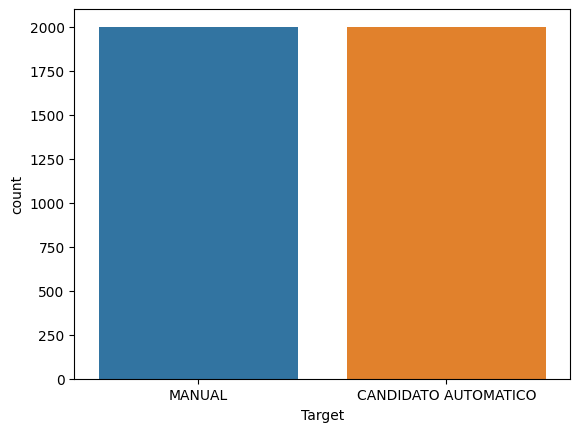

In [21]:
sns.countplot(x = df_balanceado.Target)
plt.xticks([0,1]),["AUTOMATICO","MANUAL"]
plt.xlabel("Target")
plt.show

#valores faltantes 

In [22]:
missing_values = df_balanceado.isnull().sum()
missing_values

Proceso                 0
FechaCreacion           0
EsRepresa               0
Tramite                 0
TipoLiquidacion         0
Instancia               0
TiemposPublicos         0
TipoDoc                 0
CodigoDane           3931
TipoDeSolicitante       1
Origen                  0
Proceso_Entrada         2
Oficina                20
EsFortalecimiento       0
TipoRadicado          417
Grupotrabajo         4000
salariosMin             0
Target                  0
dtype: int64

In [23]:
missing_percentages = (missing_values / len(df_balanceado)) * 100
missing_percentages

Proceso                0.000
FechaCreacion          0.000
EsRepresa              0.000
Tramite                0.000
TipoLiquidacion        0.000
Instancia              0.000
TiemposPublicos        0.000
TipoDoc                0.000
CodigoDane            98.275
TipoDeSolicitante      0.025
Origen                 0.000
Proceso_Entrada        0.050
Oficina                0.500
EsFortalecimiento      0.000
TipoRadicado          10.425
Grupotrabajo         100.000
salariosMin            0.000
Target                 0.000
dtype: float64

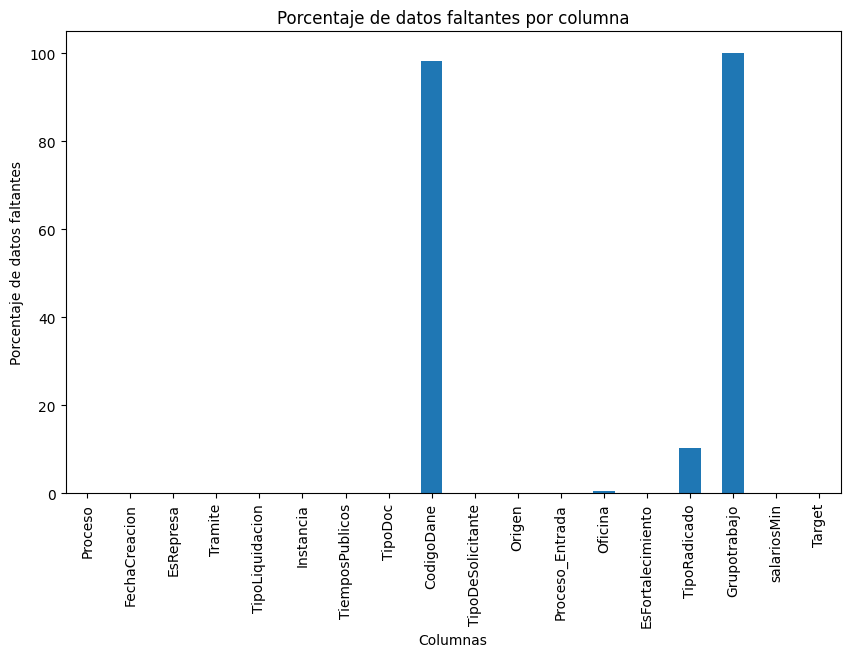

In [24]:
import matplotlib.pyplot as plt

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Genera la gráfica de barras
missing_percentages.plot(kind='bar')

# Configura el título y los ejes
plt.title('Porcentaje de datos faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de datos faltantes')

# Muestra la gráfica
plt.show()

In [25]:
df = df_balanceado
df

Proceso FechaCreacion  EsRepresa  Tramite  TipoLiquidacion  \
ID_Radicacion                                                               
58922                2    16/03/2023          0       14                1   
56550                2    22/11/2022          0       14                2   
55551                2    26/10/2022          0        7                1   
57324                2    13/10/2022          0       14                1   
68808                2    20/12/2022          0       15                1   
...                ...           ...        ...      ...              ...   
10301                2     6/02/2023          0        7                1   
42030                2    28/03/2023          0        7                1   
26073                2     5/01/2023          0        7                1   
13556                2    15/11/2022          0        1                1   
39583                1    30/03/2023          0       14                1   

               Instancia  TiemposPublicos  TipoDoc  CodigoDane  \
ID_Radicacion                                                    
58922                  1                0      1.0         NaN   
56550                  1                0      1.0         NaN   
55551                  1                0      1.0         NaN   
57324                  1                0      1.0         NaN   
68808                  1                1      1.0         NaN   
...                  ...              ...      ...         ...   
10301                  1                0      1.0         NaN   
42030                  1                0      1.0         NaN   
26073                  1                0      1.0         NaN   
13556                  1                0      1.0         NaN   
39583                  1                0      1.0         NaN   

               TipoDeSolicitante  Origen  Proceso_Entrada  Oficina  \
ID_Radicacion                                                        
58922                        1.0       1              1.0     11.0   
56550                        6.0       1              1.0     77.0   
55551                        1.0       1              1.0     83.0   
57324                        1.0       1              1.0     12.0   
68808                        5.0       1              1.0     70.0   
...                          ...     ...              ...      ...   
10301                        1.0       1              1.0     26.0   
42030                        1.0       1              1.0     12.0   
26073                        1.0       1              1.0      7.0   
13556                       18.0       1              1.0     15.0   
39583                        1.0       1              1.0     70.0   

               EsFortalecimiento  TipoRadicado  Grupotrabajo  salariosMin  \
ID_Radicacion                                                               
58922                          1           1.0           NaN         1.07   
56550                          1           1.0           NaN        22.05   
55551                          1           1.0           NaN        22.04   
57324                          1           1.0           NaN        22.06   
68808                          1           1.0           NaN         1.01   
...                          ...           ...           ...          ...   
10301                          1           1.0           NaN         3.06   
42030                          1           1.0           NaN        19.05   
26073                          1           1.0           NaN        11.00   
13556                          1           1.0           NaN         2.00   
39583                          1           NaN           NaN        11.03   

                             Target  
ID_Radicacion                        
58922                        MANUAL  
56550                        MANUAL  
55551                        MANUAL  
57324                        MANUAL  
68808        

In [26]:
from matplotlib.colors import Colormap
fig = px.imshow((df.corr()*100).round(2), text_auto=True, width=640, color_continuous_scale='Armyrose', color_continuous_midpoint=0, title='Correlación')
fig.update_layout(xaxis={'side': 'bottom'})
fig.show()

In [27]:
df.isnull

<bound method DataFrame.isnull of                Proceso FechaCreacion  EsRepresa  Tramite  TipoLiquidacion  \
ID_Radicacion                                                               
58922                2    16/03/2023          0       14                1   
56550                2    22/11/2022          0       14                2   
55551                2    26/10/2022          0        7                1   
57324                2    13/10/2022          0       14                1   
68808                2    20/12/2022          0       15                1   
...                ...           ...        ...      ...              ...   
10301                2     6/02/2023          0        7                1   
42030                2    28/03/2023          0        7                1   
26073                2     5/01/2023          0        7                1   
13556                2    15/11/2022          0        1                1   
39583                1    30/03/2023      

In [28]:
#eliminacion Fecha de creacion Dato irrelevante

In [29]:
df = df.drop(['FechaCreacion'],axis = 'columns')

In [30]:
#elimina  ultima columna Target
x=df.iloc[:,:-1].values
x

array([[ 2.  ,  0.  , 14.  , ...,  1.  ,   nan,  1.07],
       [ 2.  ,  0.  , 14.  , ...,  1.  ,   nan, 22.05],
       [ 2.  ,  0.  ,  7.  , ...,  1.  ,   nan, 22.04],
       ...,
       [ 2.  ,  0.  ,  7.  , ...,  1.  ,   nan, 11.  ],
       [ 2.  ,  0.  ,  1.  , ...,  1.  ,   nan,  2.  ],
       [ 1.  ,  0.  , 14.  , ...,   nan,   nan, 11.03]])

In [31]:
X1 = df.iloc[:,:-1].values
X1

array([[ 2.  ,  0.  , 14.  , ...,  1.  ,   nan,  1.07],
       [ 2.  ,  0.  , 14.  , ...,  1.  ,   nan, 22.05],
       [ 2.  ,  0.  ,  7.  , ...,  1.  ,   nan, 22.04],
       ...,
       [ 2.  ,  0.  ,  7.  , ...,  1.  ,   nan, 11.  ],
       [ 2.  ,  0.  ,  1.  , ...,  1.  ,   nan,  2.  ],
       [ 1.  ,  0.  , 14.  , ...,   nan,   nan, 11.03]])

# despues de realizar pruebas con diferentes cantidades la precision mas alta con los vecinos cercanos es 8 para determinar los valores a imputar

In [32]:
imputer1 = KNNImputer(n_neighbors=8, weights='distance')#=8 vecinos
Y1 = imputer1.fit_transform(X1)
pd.DataFrame(Y1)

0    1     2    3    4    5    6             7     8    9    10    11  \
0     2.0  0.0  14.0  1.0  1.0  0.0  1.0  23401.987508   1.0  1.0  1.0  11.0   
1     2.0  0.0  14.0  2.0  1.0  0.0  1.0  21365.316978   6.0  1.0  1.0  77.0   
2     2.0  0.0   7.0  1.0  1.0  0.0  1.0  22190.478831   1.0  1.0  1.0  83.0   
3     2.0  0.0  14.0  1.0  1.0  0.0  1.0  17551.003157   1.0  1.0  1.0  12.0   
4     2.0  0.0  15.0  1.0  1.0  1.0  1.0  22156.266050   5.0  1.0  1.0  70.0   
...   ...  ...   ...  ...  ...  ...  ...           ...   ...  ...  ...   ...   
3995  2.0  0.0   7.0  1.0  1.0  0.0  1.0  26502.798103   1.0  1.0  1.0  26.0   
3996  2.0  0.0   7.0  1.0  1.0  0.0  1.0  21313.005230   1.0  1.0  1.0  12.0   
3997  2.0  0.0   7.0  1.0  1.0  0.0  1.0  32109.794417   1.0  1.0  1.0   7.0   
3998  2.0  0.0   1.0  1.0  1.0  0.0  1.0  38974.330802  18.0  1.0  1.0  15.0   
3999  1.0  0.0  14.0  1.0  1.0  0.0  1.0  18395.418367   1.0  1.0  1.0  70.0   

       12   13     14  
0     1.0  1.0   1.07  
1     1.0  1.0  22.05  
2     1.0  1.0  22.04  
3     1.0  1.0  22.06  
4     1.0  1.0   1.01  
...   ...  ...    ...  
3995  1.0  1.0   3.06  
3996  1.0  1.0  19.05  
3997  1.0  1.0  11.00  
3998  1.0  1.0   2.00  
3999  1.0  1.0  11.03  

[4000 rows x 15 columns]

#resultado com Imputacion de datos

In [33]:
df.iloc[:, :Y1.shape[1]] = Y1
dfbase = df
df

Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   
...                ...        ...      ...              ...        ...   
10301              2.0        0.0      7.0              1.0        1.0   
42030              2.0        0.0      7.0              1.0        1.0   
26073              2.0        0.0      7.0              1.0        1.0   
13556              2.0        0.0      1.0              1.0        1.0   
39583              1.0        0.0     14.0              1.0        1.0   

               TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante  \
ID_Radicacion                                                              
58922                      0.0      1.0  23401.987508                1.0   
56550                      0.0      1.0  21365.316978                6.0   
55551                      0.0      1.0  22190.478831                1.0   
57324                      0.0      1.0  17551.003157                1.0   
68808                      1.0      1.0  22156.266050                5.0   
...                        ...      ...           ...                ...   
10301                      0.0      1.0  26502.798103                1.0   
42030                      0.0      1.0  21313.005230                1.0   
26073                      0.0      1.0  32109.794417                1.0   
13556                      0.0      1.0  38974.330802               18.0   
39583                      0.0      1.0  18395.418367                1.0   

               Origen  Proceso_Entrada  Oficina  EsFortalecimiento  \
ID_Radicacion                                                        
58922             1.0              1.0     11.0                1.0   
56550             1.0              1.0     77.0                1.0   
55551             1.0              1.0     83.0                1.0   
57324             1.0              1.0     12.0                1.0   
68808             1.0              1.0     70.0                1.0   
...               ...              ...      ...                ...   
10301             1.0              1.0     26.0                1.0   
42030             1.0              1.0     12.0                1.0   
26073             1.0              1.0      7.0                1.0   
13556             1.0              1.0     15.0                1.0   
39583             1.0              1.0     70.0                1.0   

               TipoRadicado  Grupotrabajo  salariosMin                Target  
ID_Radicacion                                                                 
58922                   1.0          1.07         1.07                MANUAL  
56550                   1.0         22.05        22.05                MANUAL  
55551                   1.0         22.04        22.04                MANUAL  
57324                   1.0         22.06        22.06                MANUAL  
68808                   1.0          1.01         1.01                MANUAL  
...                     ...           ...          ...                   ...  
10301                   1.0          3.06         3.06  CANDIDATO AUTOMATICO  
42030                   1.0         19.05        19.05  CANDIDATO AUTOMATICO  
26073                   1.0         11.00        11.00  CANDIDATO AUTOMATICO  
13556                   1.0          2.00         2.00  CANDIDATO AUTOMATICO  
39583                   1.0         11.03        11.03  CANDIDATO AUTOMATICO  

[4000 rows x 17 columns]

#validacion de valores

In [34]:
missing_values = df.isnull().sum()
missing_values

Proceso              0
EsRepresa            0
Tramite              0
TipoLiquidacion      0
Instancia            0
TiemposPublicos      0
TipoDoc              0
CodigoDane           0
TipoDeSolicitante    0
Origen               0
Proceso_Entrada      0
Oficina              0
EsFortalecimiento    0
TipoRadicado         0
Grupotrabajo         0
salariosMin          0
Target               0
dtype: int64

In [35]:
df.isnull

<bound method DataFrame.isnull of                Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   
...                ...        ...      ...              ...        ...   
10301              2.0        0.0      7.0              1.0        1.0   
42030              2.0        0.0      7.0              1.0        1.0   
26073              2.0        0.0      7.0              1.0        1.0   
13556              2.0        0.0      1.0              1.0        1.0   
39583              1.0        0.0     14.0              1.0        1.0   

   

In [36]:
# Obtener estadísticas descriptivas de todas las variables
descripcion = df.describe(include='all')
print(descripcion)

            Proceso  EsRepresa      Tramite  TipoLiquidacion    Instancia  \
count   4000.000000     4000.0  4000.000000      4000.000000  4000.000000   
unique          NaN        NaN          NaN              NaN          NaN   
top             NaN        NaN          NaN              NaN          NaN   
freq            NaN        NaN          NaN              NaN          NaN   
mean       1.925000        0.0    10.131750         1.098750     1.002500   
std        0.263424        0.0     4.613698         0.298363     0.120405   
min        1.000000        0.0     1.000000         1.000000     1.000000   
25%        2.000000        0.0     7.000000         1.000000     1.000000   
50%        2.000000        0.0    14.000000         1.000000     1.000000   
75%        2.000000        0.0    14.000000         1.000000     1.000000   
max        2.000000        0.0    19.000000         2.000000     8.000000   

        TiemposPublicos      TipoDoc    CodigoDane  TipoDeSolicitante  \
co

In [37]:
from matplotlib.colors import Colormap
fig = px.imshow((df.corr()*100).round(2), text_auto=True, width=640, color_continuous_scale='Armyrose', color_continuous_midpoint=0, title='Correlación')
fig.update_layout(xaxis={'side': 'bottom'})
fig.show()

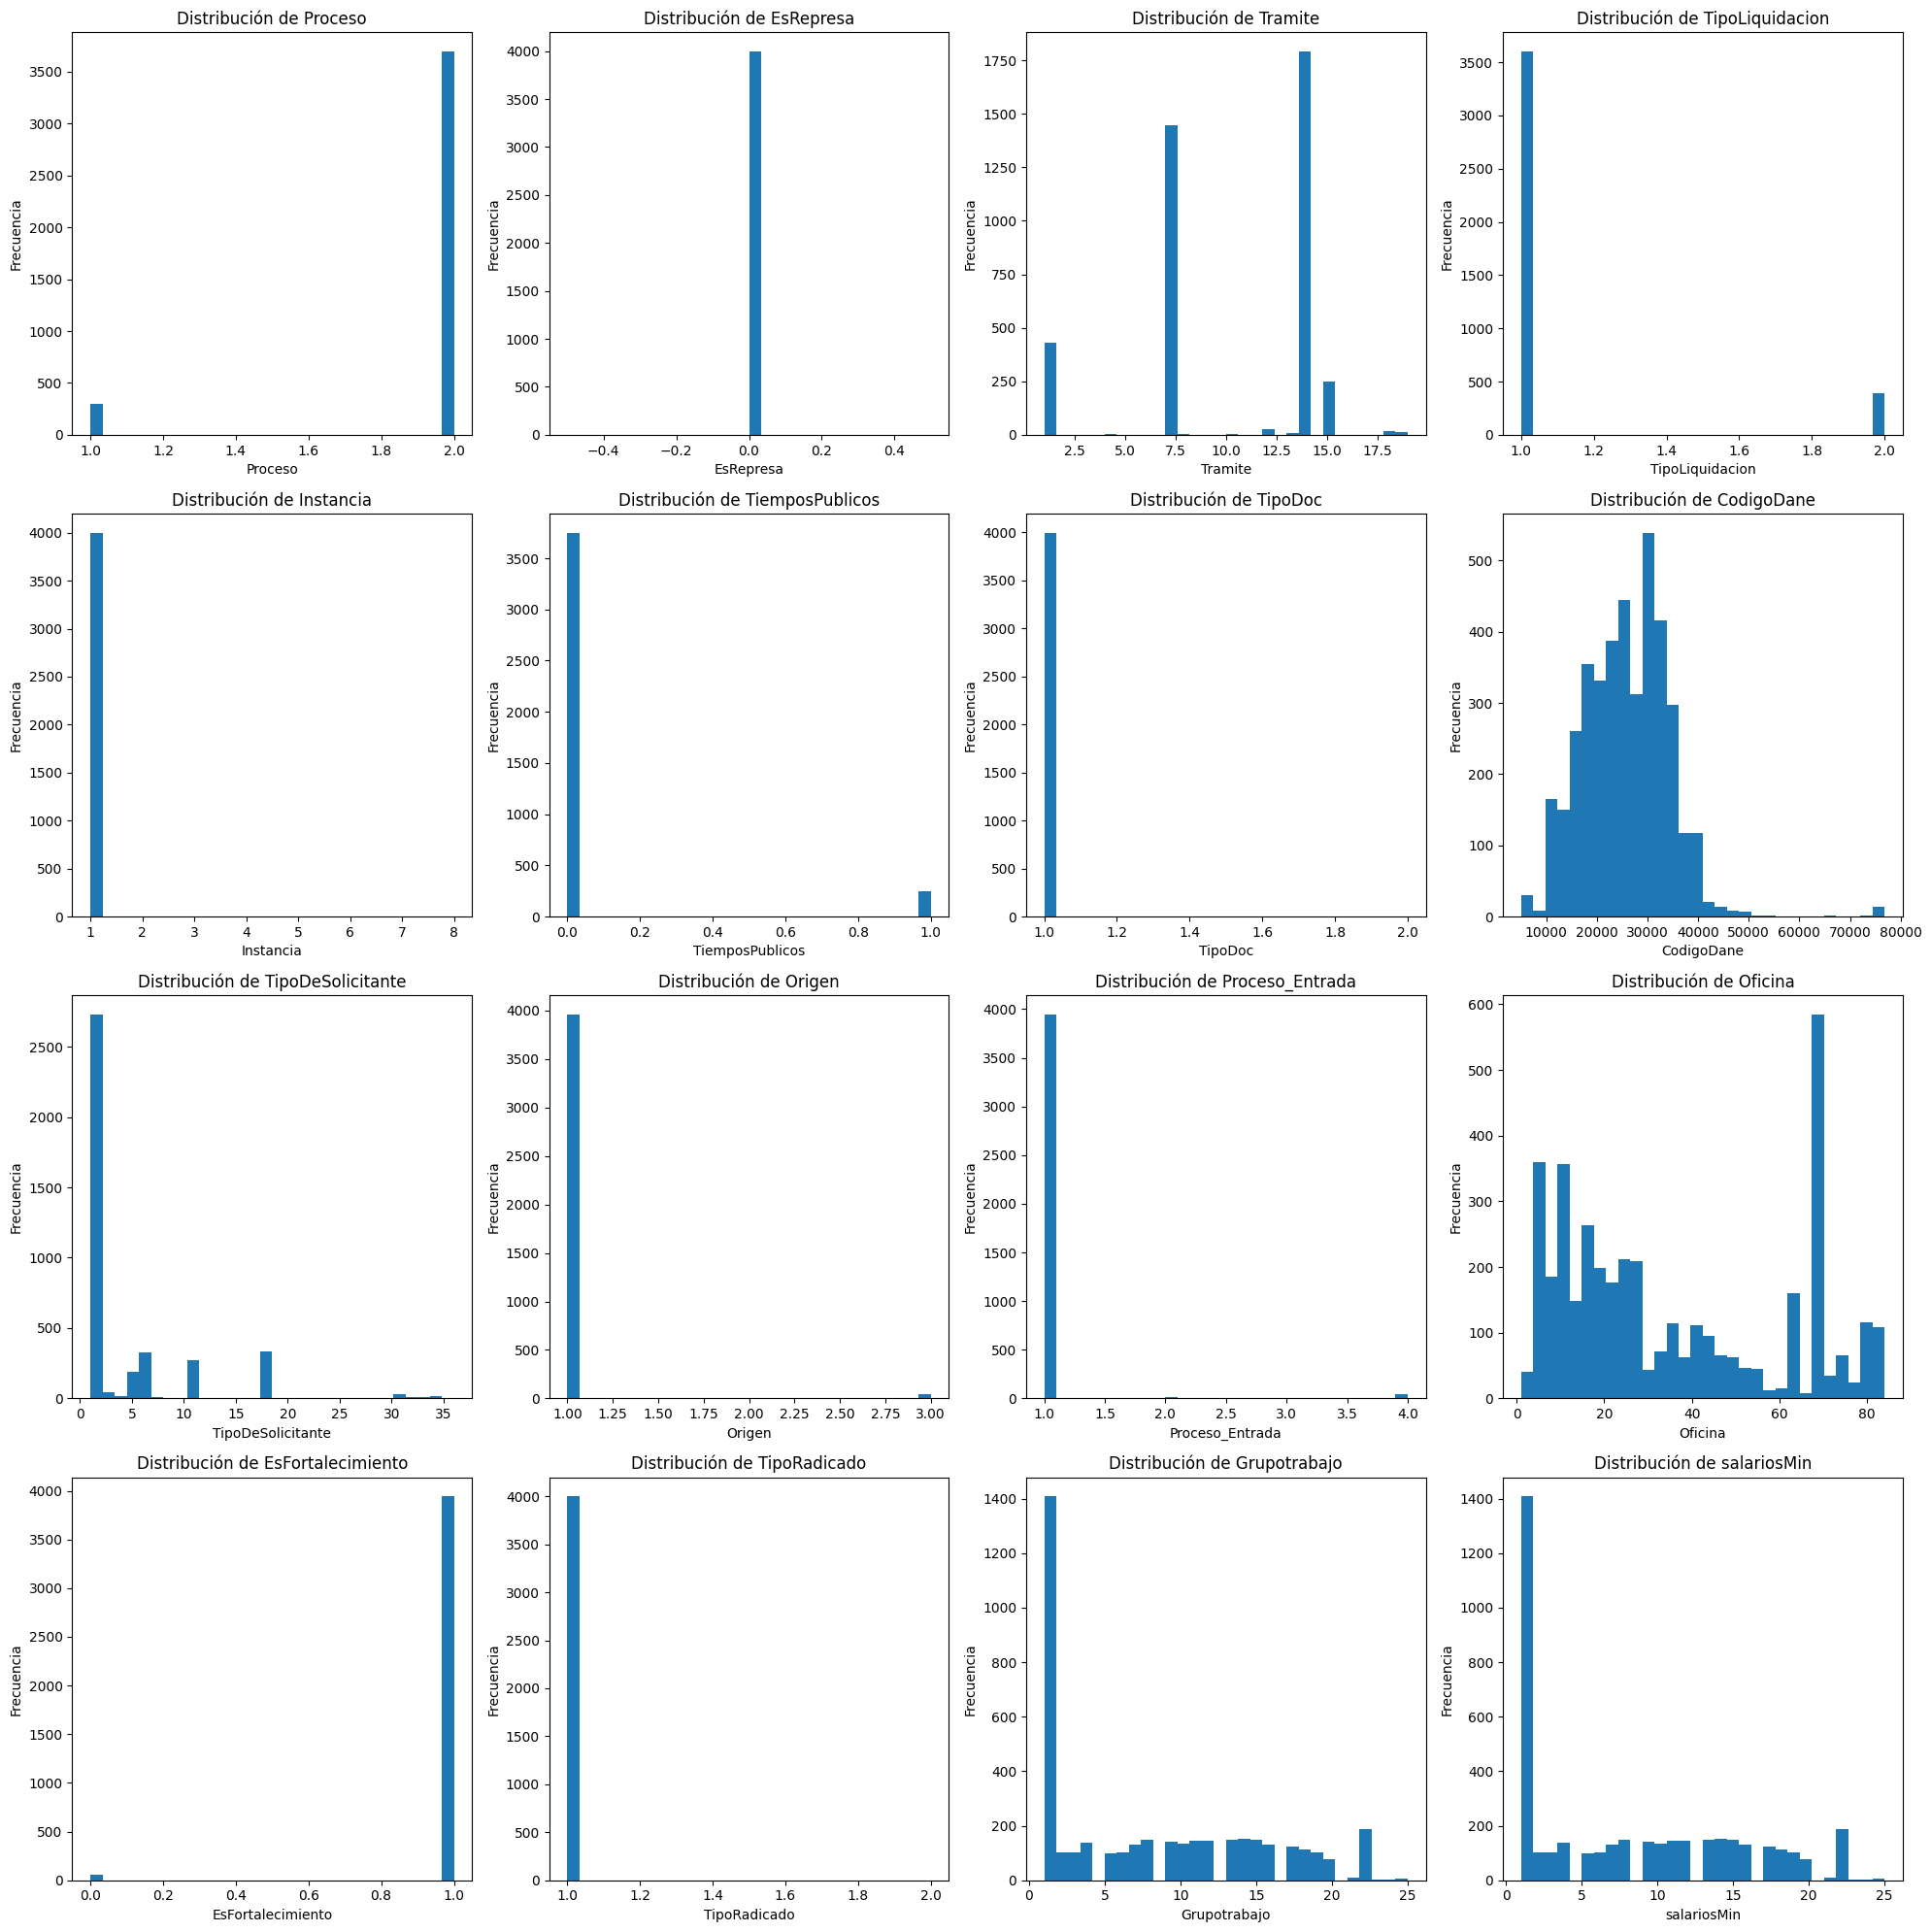

In [38]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axs = plt.subplots(nrows=4, ncols = 4, figsize= (20,20))
i=0
j=0
for columna in columnas_numericas:
    axs[i,j].hist(df[columna],bins=30)
    axs[i,j].set_xlabel(columna)
    axs[i,j].set_ylabel('Frecuencia')
    axs[i,j].set_title(f'Distribución de {columna}')
    j=j+1
    if j==4:
       i=i+1
       j=0
plt.tight_layout()        
plt.show()

In [39]:
df = df.drop(['Target'],axis = 'columns')
df

Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   
...                ...        ...      ...              ...        ...   
10301              2.0        0.0      7.0              1.0        1.0   
42030              2.0        0.0      7.0              1.0        1.0   
26073              2.0        0.0      7.0              1.0        1.0   
13556              2.0        0.0      1.0              1.0        1.0   
39583              1.0        0.0     14.0              1.0        1.0   

               TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante  \
ID_Radicacion                                                              
58922                      0.0      1.0  23401.987508                1.0   
56550                      0.0      1.0  21365.316978                6.0   
55551                      0.0      1.0  22190.478831                1.0   
57324                      0.0      1.0  17551.003157                1.0   
68808                      1.0      1.0  22156.266050                5.0   
...                        ...      ...           ...                ...   
10301                      0.0      1.0  26502.798103                1.0   
42030                      0.0      1.0  21313.005230                1.0   
26073                      0.0      1.0  32109.794417                1.0   
13556                      0.0      1.0  38974.330802               18.0   
39583                      0.0      1.0  18395.418367                1.0   

               Origen  Proceso_Entrada  Oficina  EsFortalecimiento  \
ID_Radicacion                                                        
58922             1.0              1.0     11.0                1.0   
56550             1.0              1.0     77.0                1.0   
55551             1.0              1.0     83.0                1.0   
57324             1.0              1.0     12.0                1.0   
68808             1.0              1.0     70.0                1.0   
...               ...              ...      ...                ...   
10301             1.0              1.0     26.0                1.0   
42030             1.0              1.0     12.0                1.0   
26073             1.0              1.0      7.0                1.0   
13556             1.0              1.0     15.0                1.0   
39583             1.0              1.0     70.0                1.0   

               TipoRadicado  Grupotrabajo  salariosMin  
ID_Radicacion                                           
58922                   1.0          1.07         1.07  
56550                   1.0         22.05        22.05  
55551                   1.0         22.04        22.04  
57324                   1.0         22.06        22.06  
68808                   1.0          1.01         1.01  
...                     ...           ...          ...  
10301                   1.0          3.06         3.06  
42030                   1.0         19.05        19.05  
26073                   1.0         11.00        11.00  
13556                   1.0          2.00         2.00  
39583                   1.0         11.03        11.03  

[4000 rows x 16 columns]

In [40]:
Variables=df.columns
Variables

Index(['Proceso', 'EsRepresa', 'Tramite', 'TipoLiquidacion', 'Instancia',
       'TiemposPublicos', 'TipoDoc', 'CodigoDane', 'TipoDeSolicitante',
       'Origen', 'Proceso_Entrada', 'Oficina', 'EsFortalecimiento',
       'TipoRadicado', 'Grupotrabajo', 'salariosMin'],
      dtype='object')

In [41]:
x= df.to_numpy()
x

array([[ 2.  ,  0.  , 14.  , ...,  1.  ,  1.07,  1.07],
       [ 2.  ,  0.  , 14.  , ...,  1.  , 22.05, 22.05],
       [ 2.  ,  0.  ,  7.  , ...,  1.  , 22.04, 22.04],
       ...,
       [ 2.  ,  0.  ,  7.  , ...,  1.  , 11.  , 11.  ],
       [ 2.  ,  0.  ,  1.  , ...,  1.  ,  2.  ,  2.  ],
       [ 1.  ,  0.  , 14.  , ...,  1.  , 11.03, 11.03]])

In [42]:
type(x)

numpy.ndarray

In [43]:
names =np.unique(dfbase.loc[:, ["Target"]].to_numpy())
names

array(['CANDIDATO AUTOMATICO', 'MANUAL'], dtype=object)

In [44]:
np.size(x)

64000

In [45]:
np.size(x,axis =1) #numero de columnas (variables)

16

In [46]:
d = np.size(x, axis=1)
y = dfbase.loc[:, ["Target"]].to_numpy()
y

array([['MANUAL'],
       ['MANUAL'],
       ['MANUAL'],
       ...,
       ['CANDIDATO AUTOMATICO'],
       ['CANDIDATO AUTOMATICO'],
       ['CANDIDATO AUTOMATICO']], dtype=object)

In [47]:
Variables.shape

(16,)

#distribucion de la varianza para reduccion de dimensionalidad

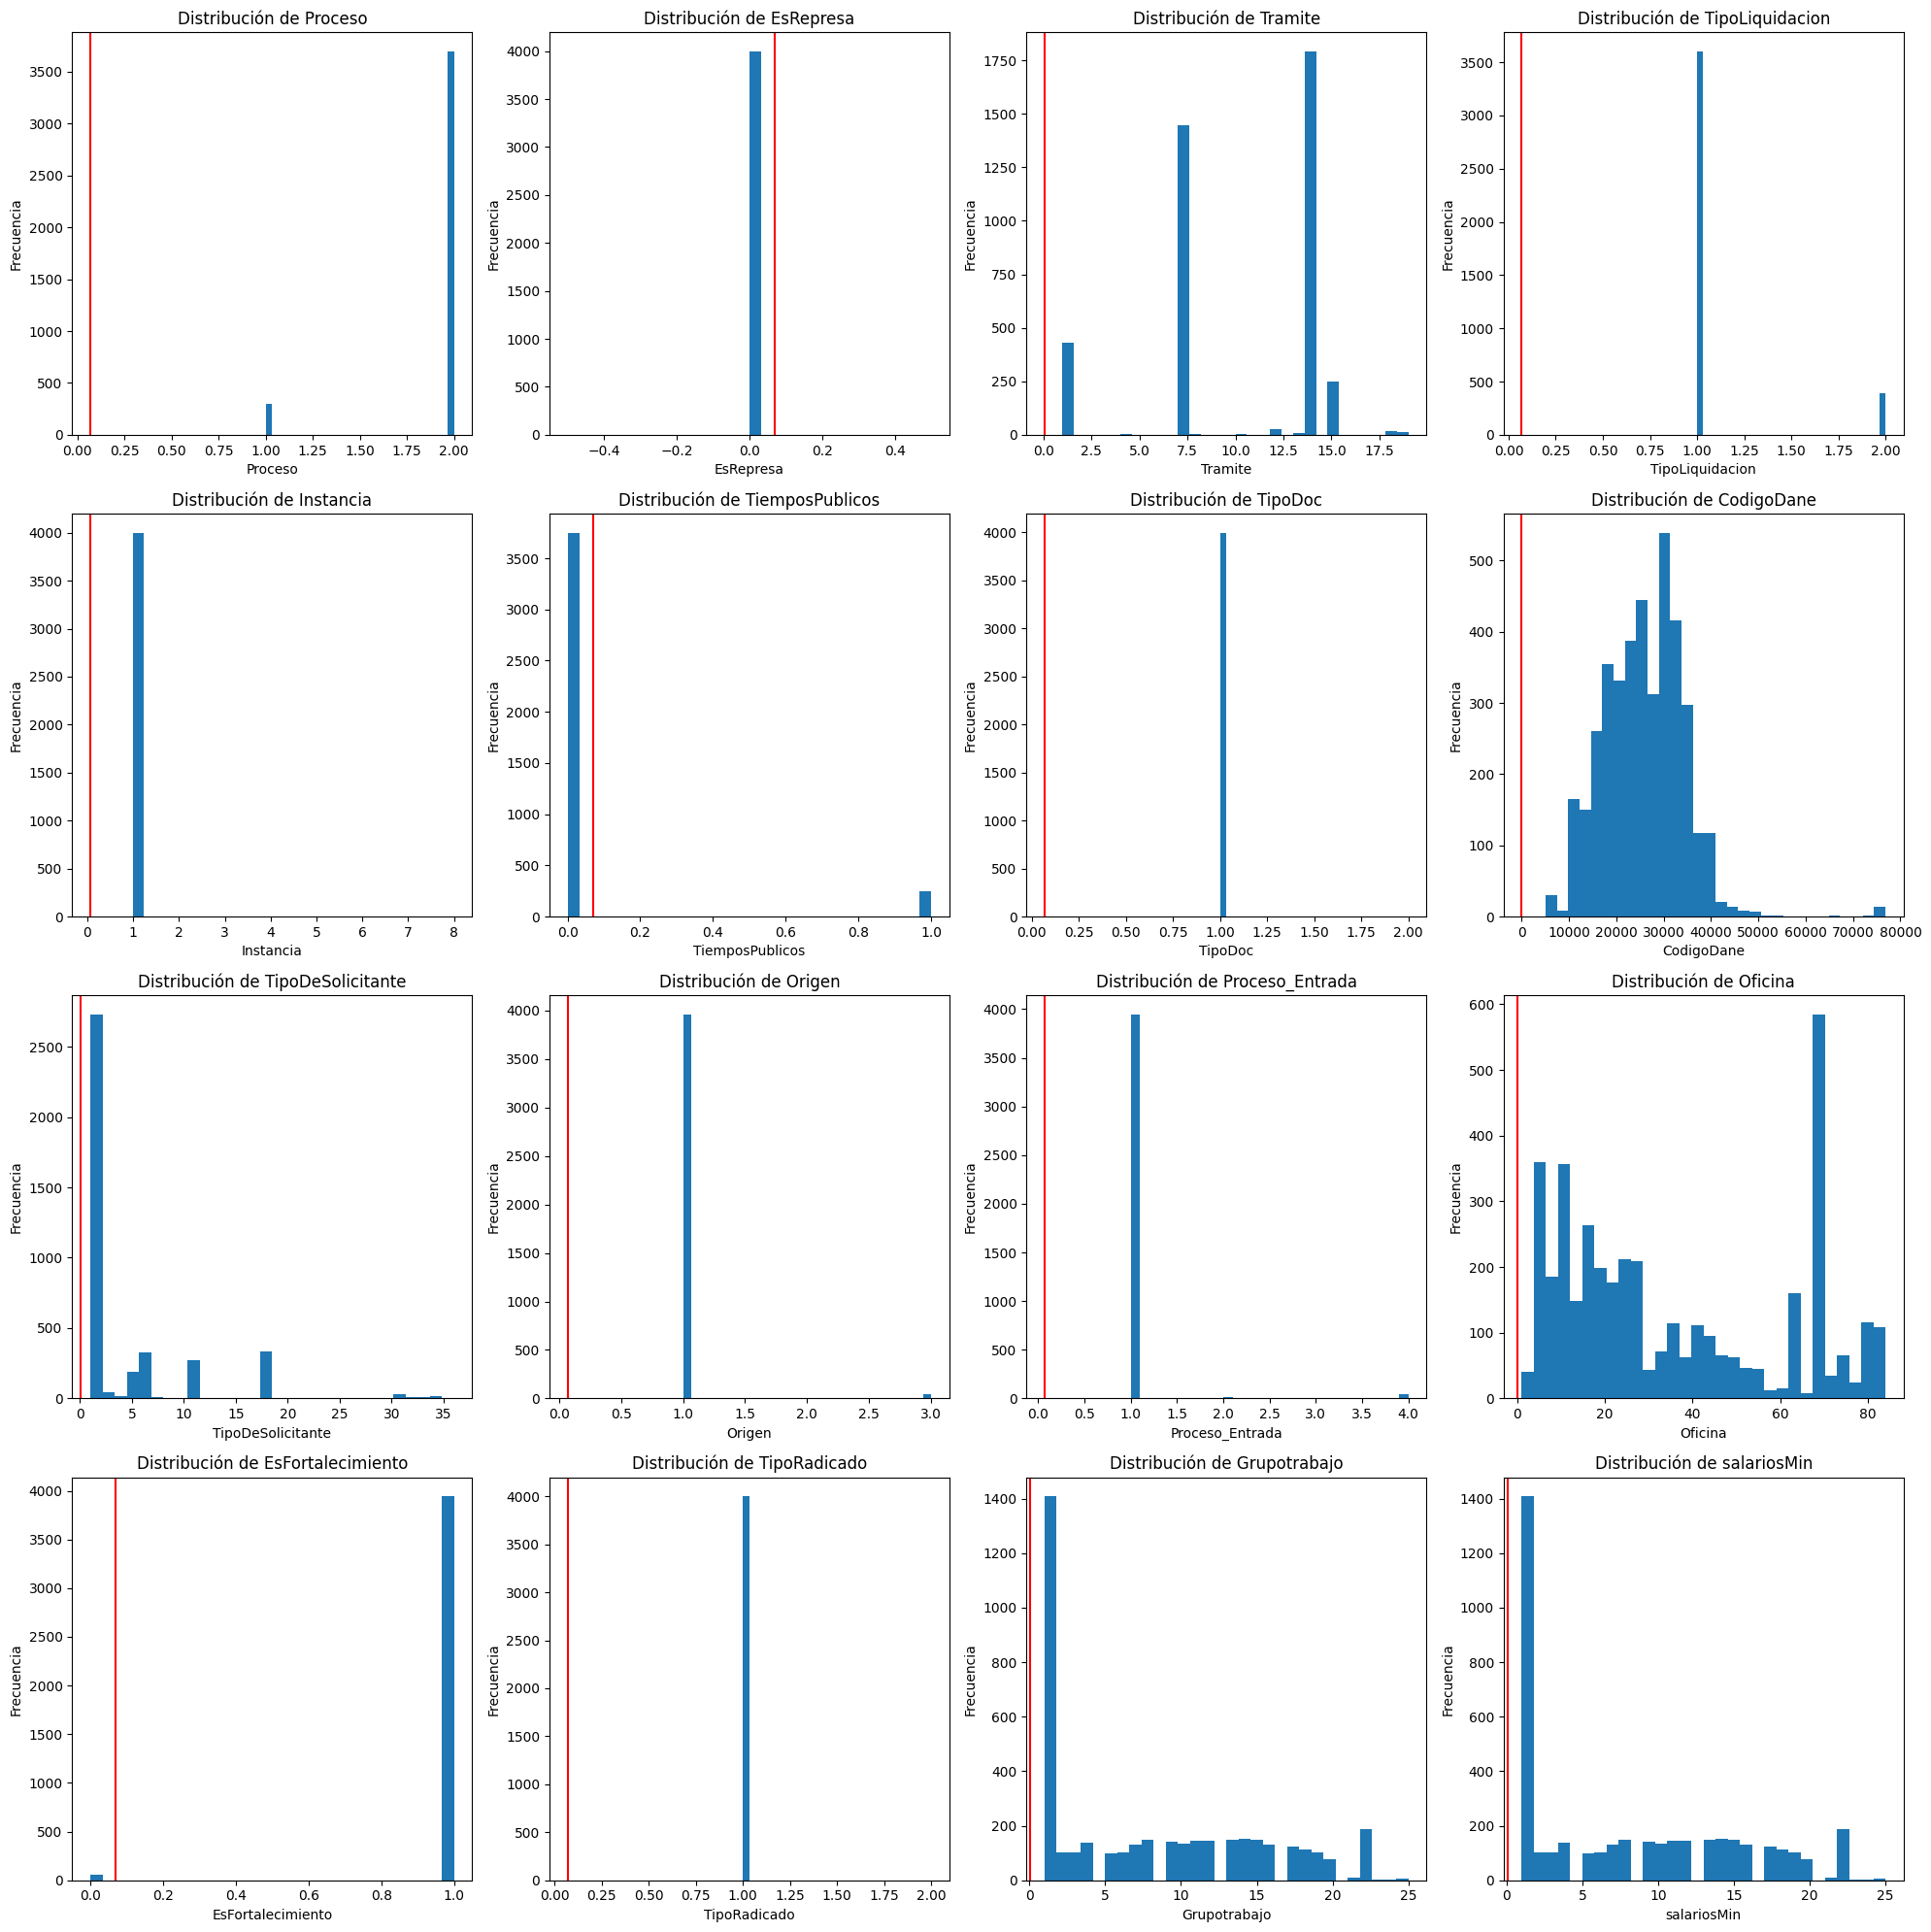

In [48]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axs = plt.subplots(nrows=4, ncols = 4, figsize= (20,20))
i=0
j=0
for columna in columnas_numericas:
    axs[i,j].hist(df[columna],bins=30)
    axs[i,j].axvline(x[:,0].var(), c = "red") 
    axs[i,j].set_xlabel(columna)
    axs[i,j].set_ylabel('Frecuencia')
    axs[i,j].set_title(f'Distribución de {columna}')
    j=j+1
    if j==4:
       i=i+1
       j=0
plt.tight_layout()        
plt.show()

In [49]:
df["target"] = y
df.head()

Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   

               TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante  \
ID_Radicacion                                                              
58922                      0.0      1.0  23401.987508                1.0   
56550                      0.0      1.0  21365.316978                6.0   
55551                      0.0      1.0  22190.478831                1.0   
57324                      0.0      1.0  17551.003157                1.0   
68808                      1.0      1.0  22156.266050                5.0   

               Origen  Proceso_Entrada  Oficina  EsFortalecimiento  \
ID_Radicacion                                                        
58922             1.0              1.0     11.0                1.0   
56550             1.0              1.0     77.0                1.0   
55551             1.0              1.0     83.0                1.0   
57324             1.0              1.0     12.0                1.0   
68808             1.0              1.0     70.0                1.0   

               TipoRadicado  Grupotrabajo  salariosMin  target  
ID_Radicacion                                                   
58922                   1.0          1.07         1.07  MANUAL  
56550                   1.0         22.05        22.05  MANUAL  
55551                   1.0         22.04        22.04  MANUAL  
57324                   1.0         22.06        22.06  MANUAL  
68808                   1.0          1.01         1.01  MANUAL

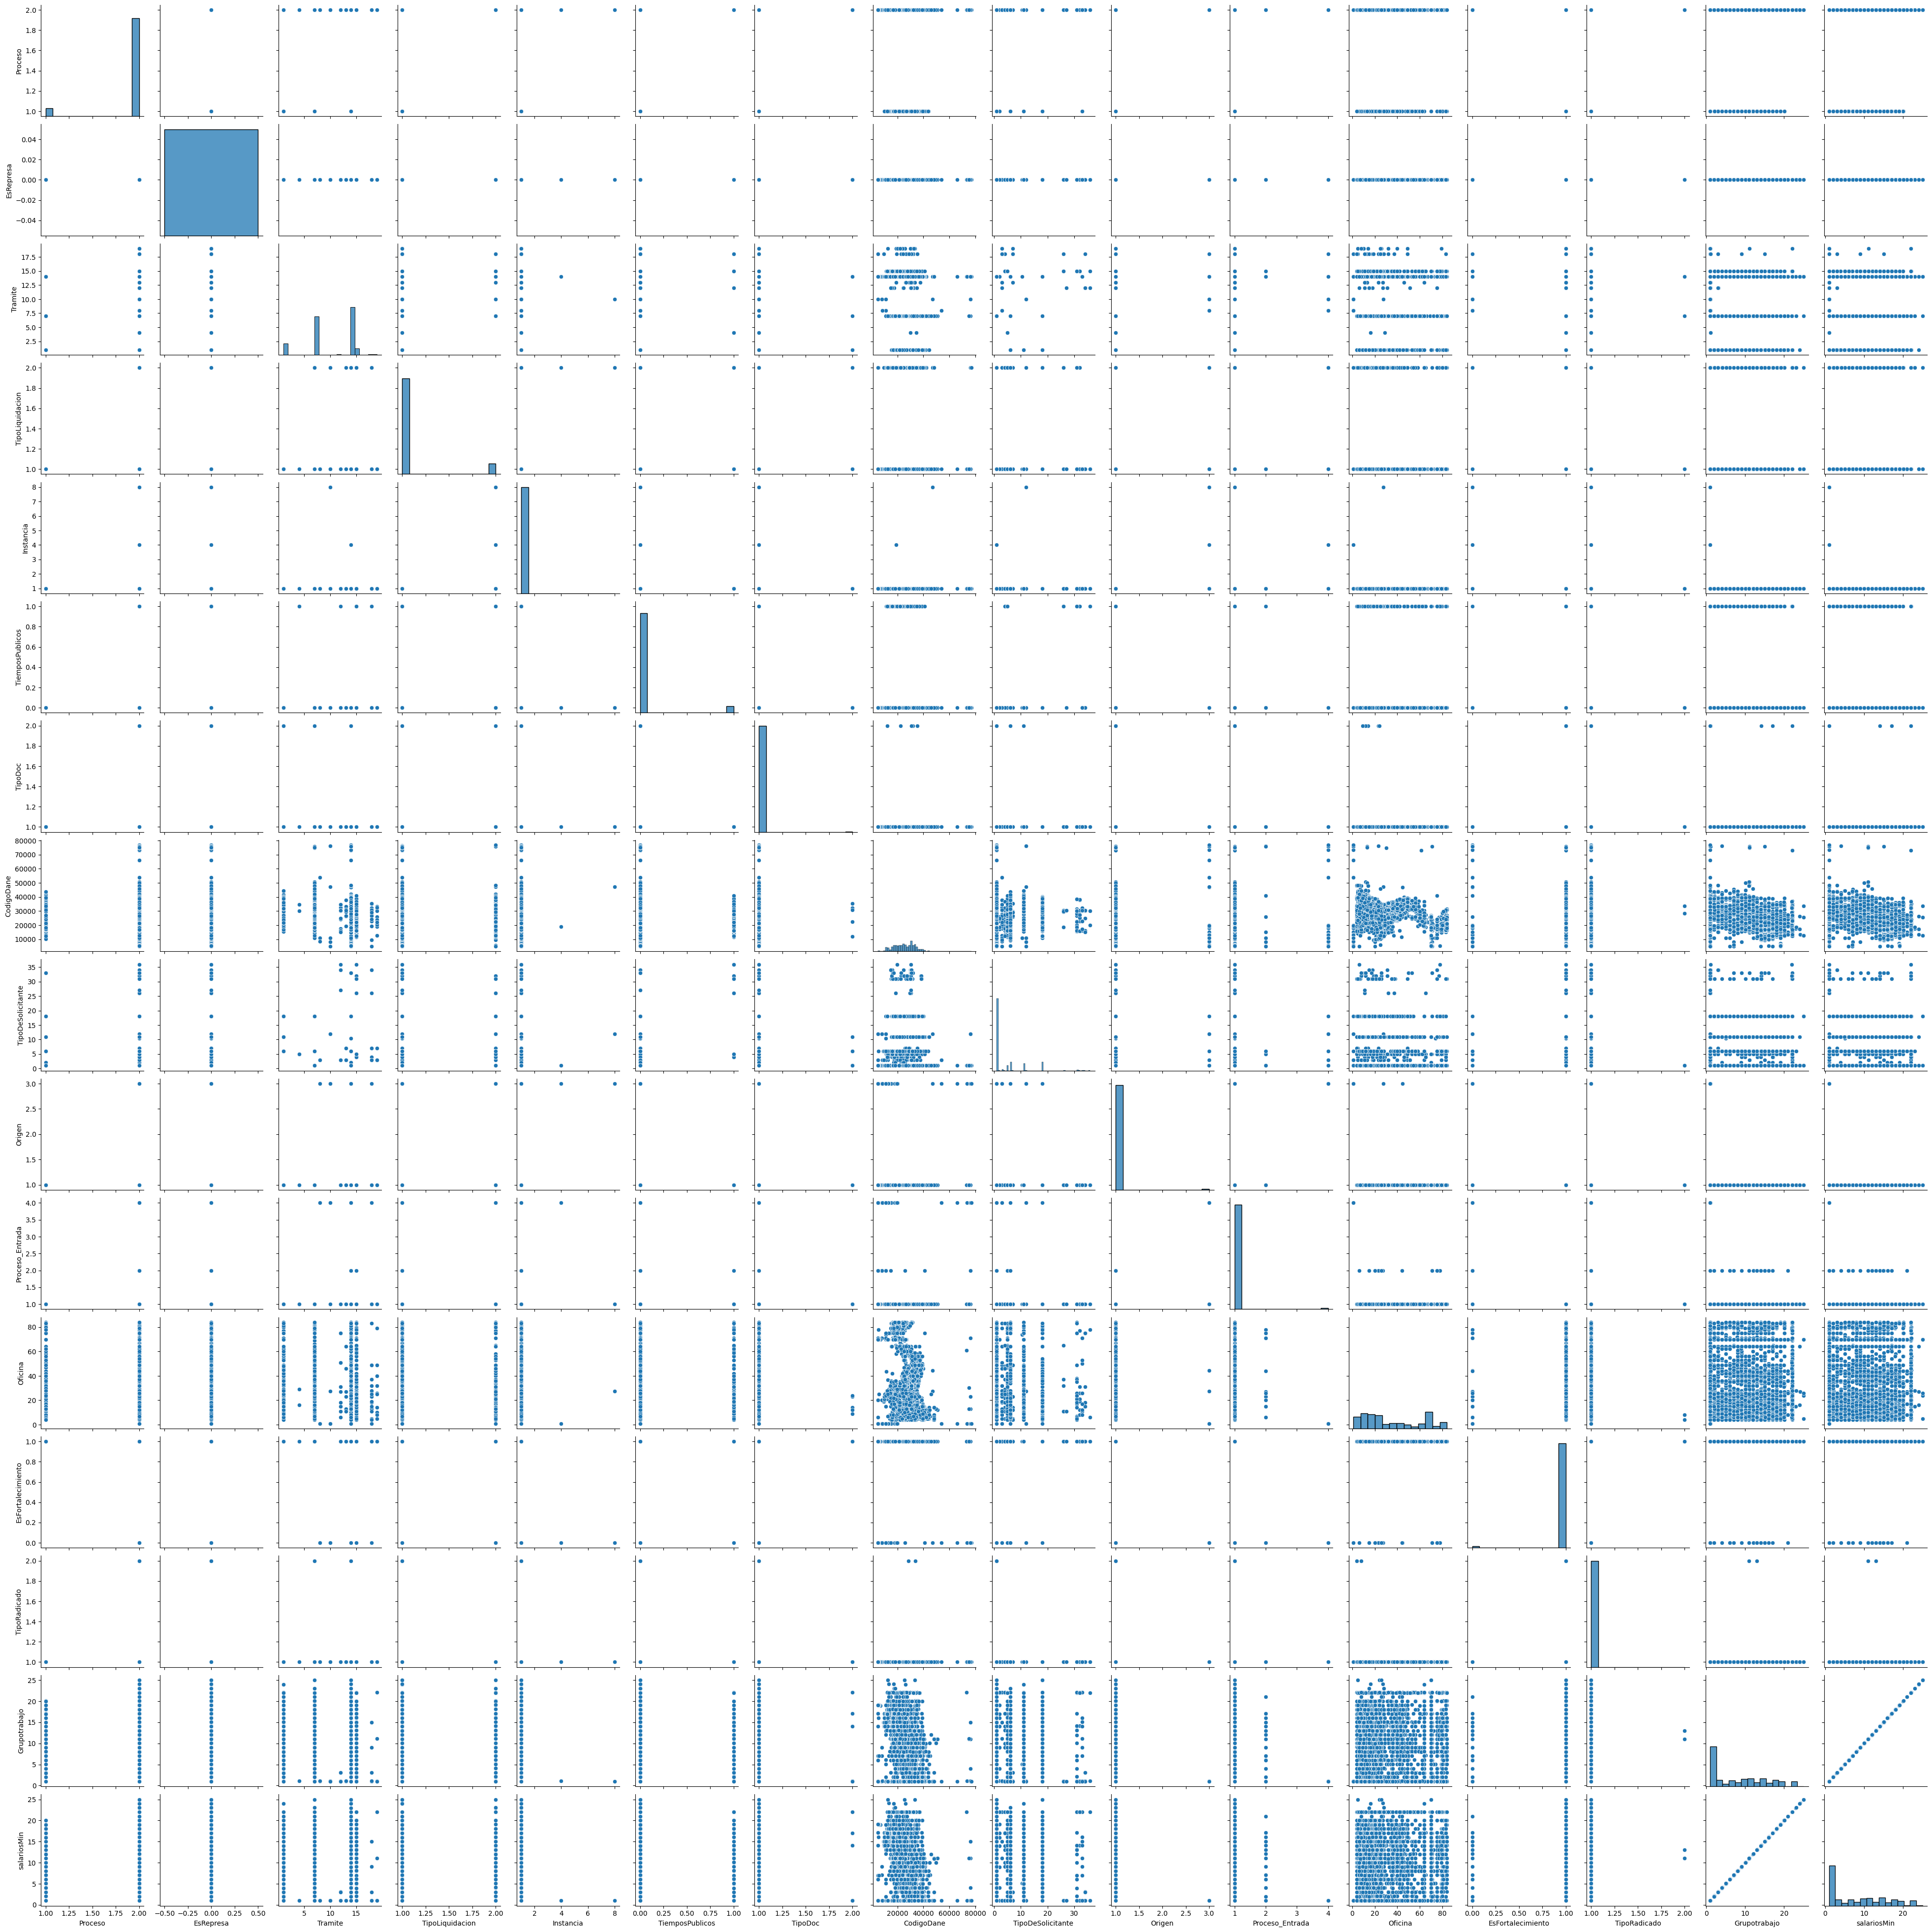

In [50]:
sns.pairplot(df)#diagonal 

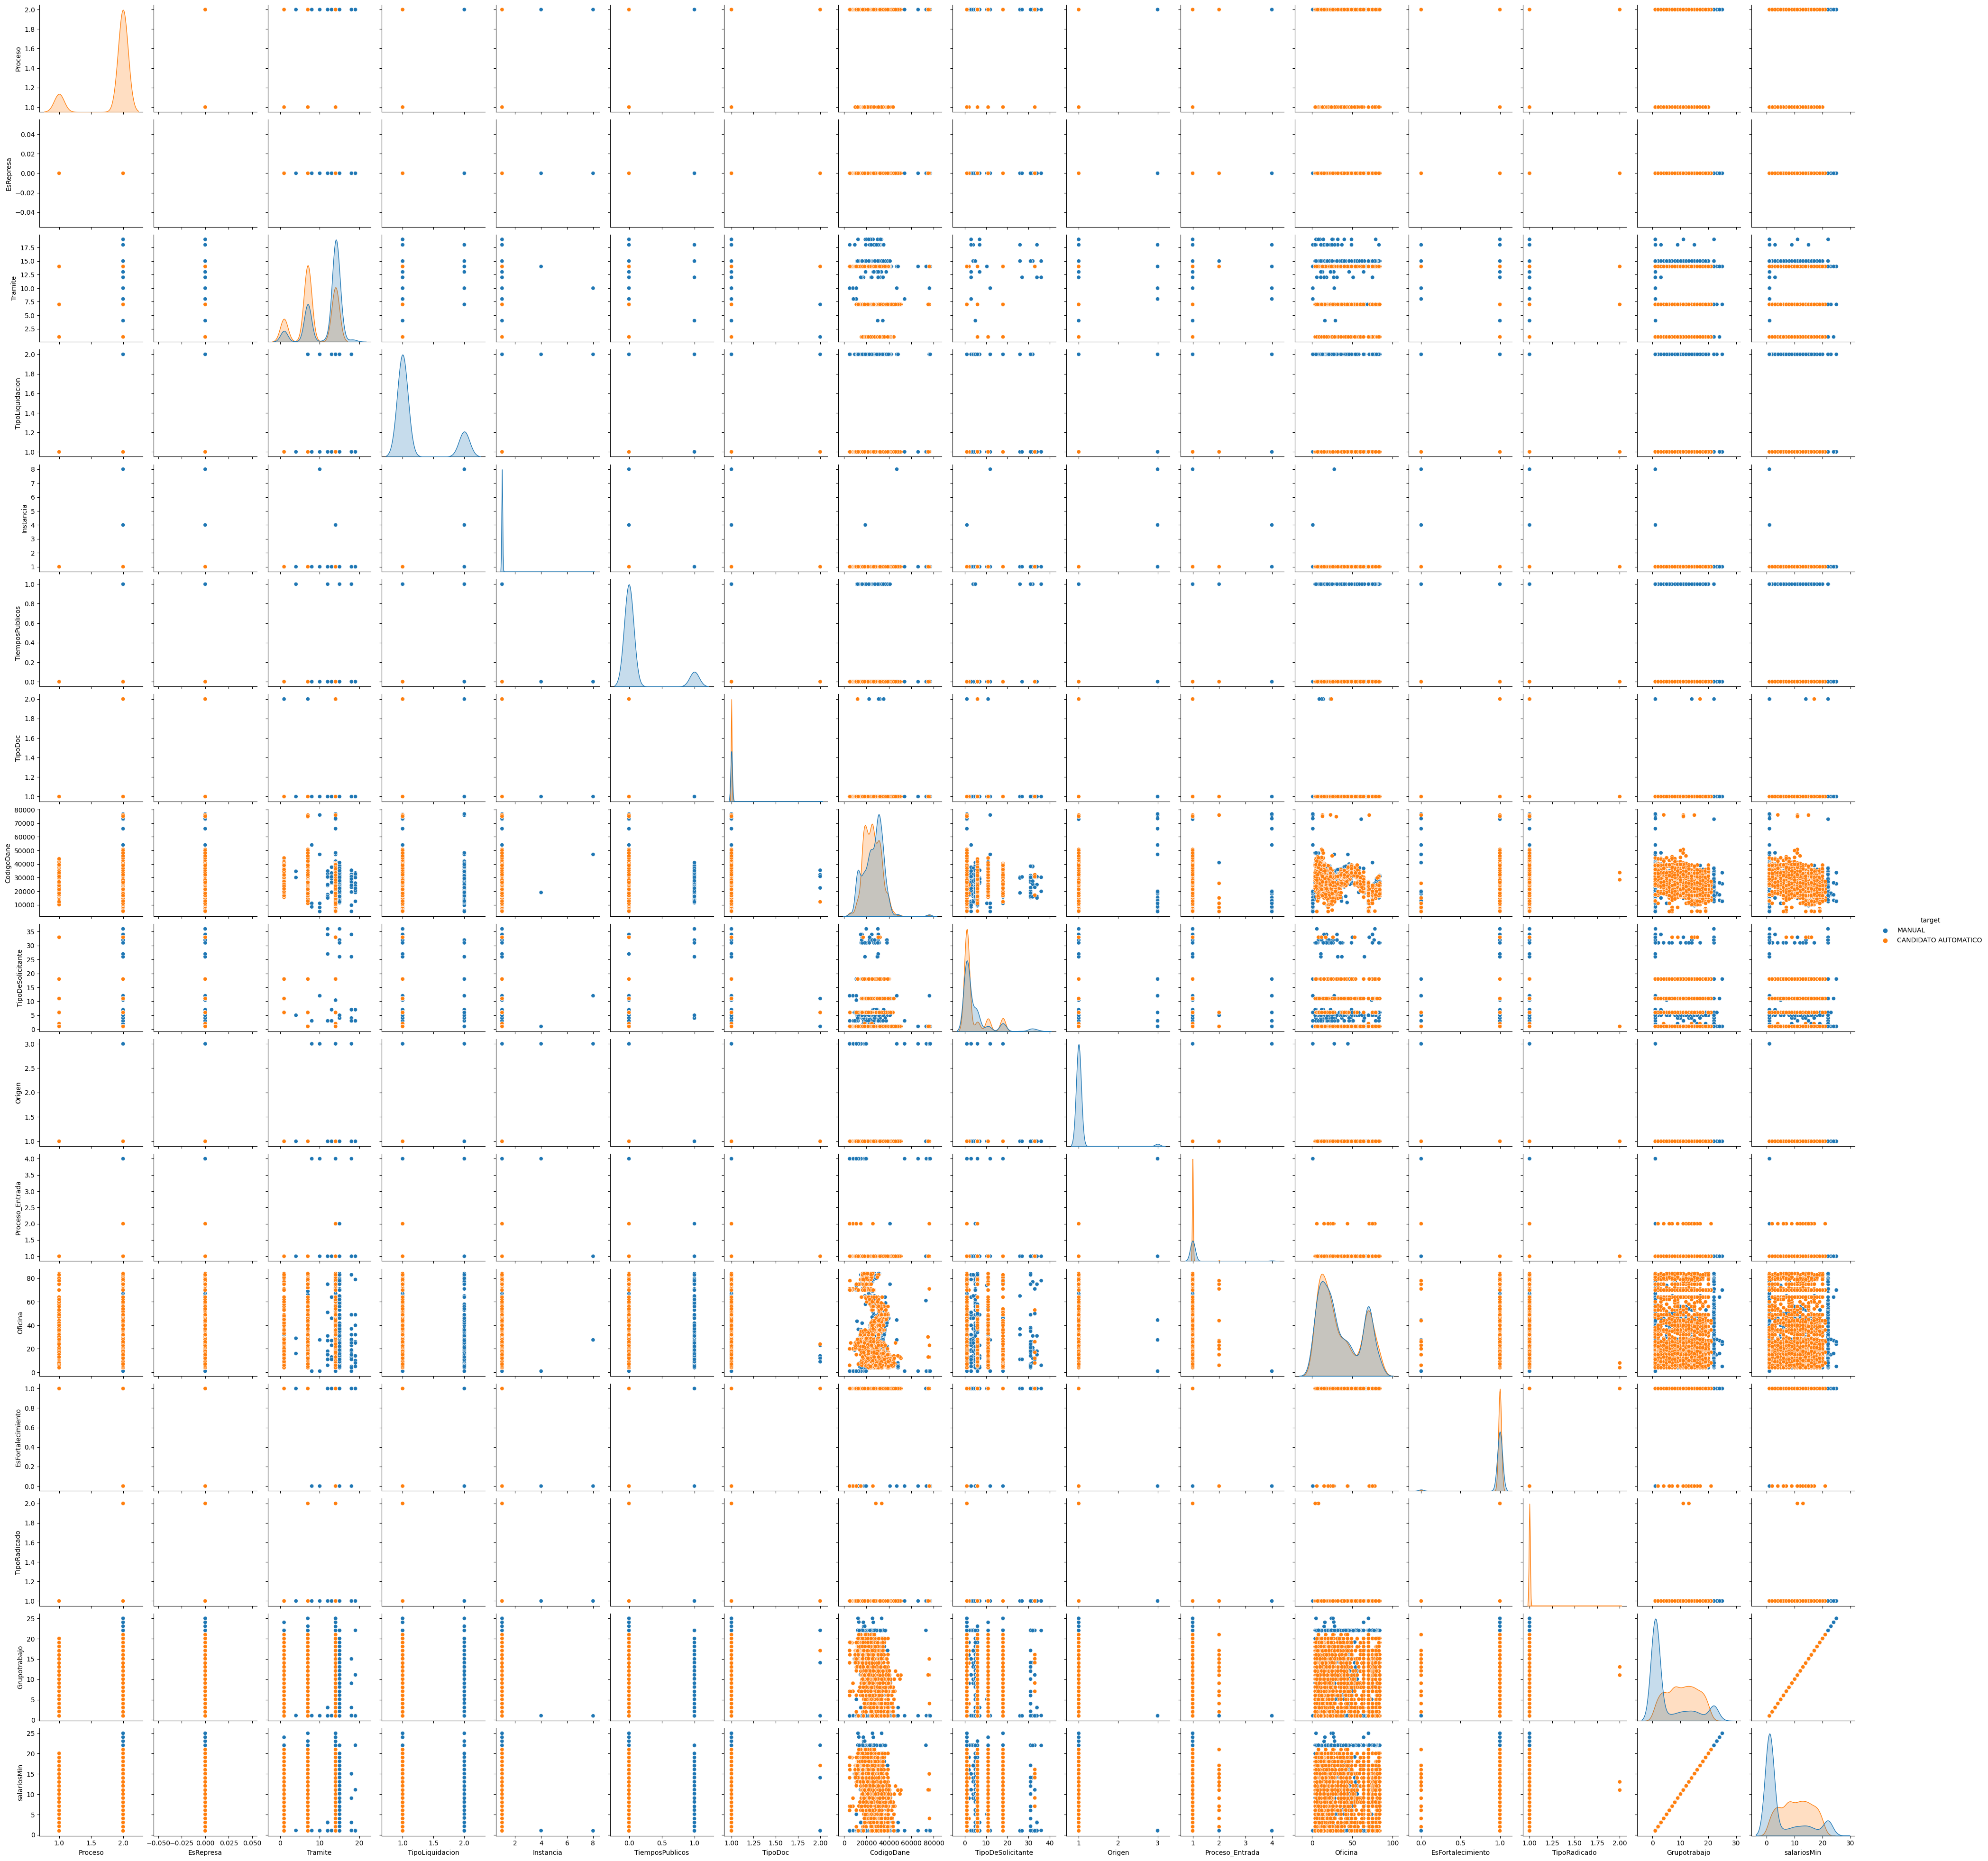

In [51]:
#histogrmas correlacion todos con todos
#clasificados por target
sns.pairplot(df,hue="target")#diagonal 

In [52]:
x_bar = x - np.var(x,axis=0)

In [53]:
#matriz de coovarianza
# transponer
A = np.transpose(x_bar)
K = np.cov(A)
K

array([[ 6.93923481e-02,  0.00000000e+00,  6.38972243e-02,
         7.40810203e-03,  1.87546887e-04,  4.72618155e-03,
         9.37734434e-05,  4.66777216e+01,  5.79413140e-02,
         1.61290323e-03,  2.60690173e-03, -1.27702930e-01,
        -1.10652663e-03,  3.75093773e-05, -1.85854089e-01,
        -1.85854089e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.38972243e-02,  0.00000000e+00,  2.12862135e+01,
         3.50827394e-01,  2.67129282e-03,  3.02025256e-01,
        -3.41554139e-03, -7.50872966e+03, -7.06794175e+00,
         6.41834209e-02,  1.09198987e-01,  1.22712600e+01,
        -4.78186422e-02,  1.84171043e-04, -4.70741207e+00,
        -4.70741207e+00],
       [ 7.40810203e-03,  0.00000000e

In [54]:
#CALCULAR VALORES Y VECTORES PROPIOS
#valores propios
eig_vals,eig_Vecs = np.linalg.eig(K)
eig_vals

array([ 7.19353573e+07,  5.74666139e+02,  8.78668570e+01,  4.20215576e+01,
        1.75410347e+01,  1.42690813e-01,  8.17417986e-02,  6.65989074e-02,
        4.89493190e-02,  1.49719707e-02,  3.34833665e-03,  1.24659103e-03,
        8.06171737e-04,  4.99148118e-04, -3.58735291e-12,  0.00000000e+00])

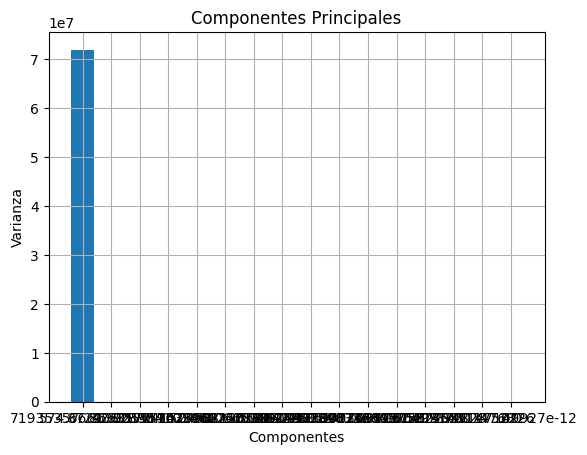

In [55]:
#decidir cantidad de variables a seleccionar
x_axes_labels = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]

plt.figure(dpi = 100)
plt.grid(True)
plt.title("Componentes Principales")
plt.xlabel("Componentes")
plt.ylabel("Varianza")
plt.bar(list(range(d)), eig_vals)
plt.xticks(list(range(d)), eig_vals)
plt.show()

In [56]:
per_eig_vals= (100*(eig_vals/sum(eig_vals))).round(6)

per_eig_vals

array([ 9.9998996e+01,  7.9900000e-04,  1.2200000e-04,  5.8000000e-05,
        2.4000000e-05,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  0.0000000e+00])

In [57]:
np.cumsum(per_eig_vals)

array([99.998996, 99.999795, 99.999917, 99.999975, 99.999999, 99.999999,
       99.999999, 99.999999, 99.999999, 99.999999, 99.999999, 99.999999,
       99.999999, 99.999999, 99.999999, 99.999999])

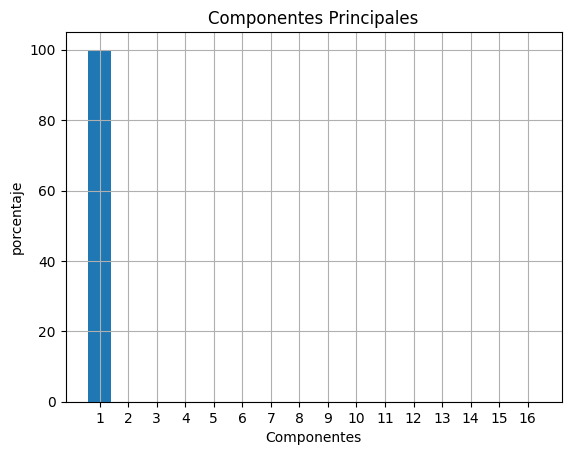

In [58]:
x_axes_labels = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]

plt.figure(dpi = 100)
plt.grid(True)
plt.title("Componentes Principales")
plt.xlabel("Componentes")
plt.ylabel("porcentaje")
plt.bar(list(range(d)),per_eig_vals)
plt.xticks(list(range(d)), x_axes_labels)
plt.show()

In [59]:
#utilizar el 95% 28 variables
#m=2
m=16
M =eig_Vecs[:,:16]
M

array([[ 6.48887037e-07,  1.21217499e-04, -2.87871843e-03,
         1.31546375e-03,  2.86197596e-03,  2.20014642e-02,
         3.84441095e-01,  9.08574092e-01,  1.61768100e-01,
        -2.65874881e-03,  4.02903912e-03, -1.51594991e-03,
         8.75168270e-04, -7.68992453e-04, -6.40774946e-14,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-1.04381745e-04, -8.79596640e-03, -1.40603304e-01,
        -2.50959140e-01,  9.57279338e-01, -4.84279996e-03,
        -2.04091912e-02,  2.35543571e-03,  1.85196044e-02,
        -4.49850506e-04,  5.60267915e-04,  1.69540089e-04,
         2.24601414e-04, -5.80950490e-05,  2.21464082e-14,
         0.00000000e+00],
       [ 4.01344049e-06,  4.78934863e

In [60]:
#multiplicamatrices
A_m =np.matmul(np.transpose(M),A)

In [61]:
x_m =np.transpose(A_m)
x_m

array([[-7.18938369e+07,  7.46605209e+04, -2.79803213e+04, ...,
         4.03959510e+00, -1.68376673e-08,  0.00000000e+00],
       [-7.18958737e+07,  7.45978649e+04, -2.79489402e+04, ...,
         4.04089956e+00, -1.68389356e-08,  0.00000000e+00],
       [-7.18950485e+07,  7.45910213e+04, -2.79476609e+04, ...,
         4.04029959e+00, -1.68382641e-08,  0.00000000e+00],
       ...,
       [-7.18851291e+07,  7.46561489e+04, -2.79622430e+04, ...,
         4.03892455e+00, -1.68356493e-08,  0.00000000e+00],
       [-7.18782646e+07,  7.46408579e+04, -2.79701431e+04, ...,
         4.04036767e+00, -1.68349956e-08,  0.00000000e+00],
       [-7.18988436e+07,  7.46072623e+04, -2.79660117e+04, ...,
         4.04123028e+00, -1.68389889e-08,  0.00000000e+00]])

<function matplotlib.pyplot.show(close=None, block=None)>

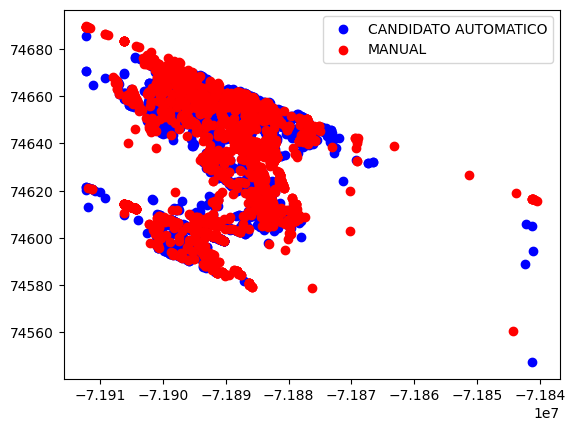

In [62]:
plt.scatter(x_m[np.where (y == 'CANDIDATO AUTOMATICO')[0],0], x_m[np.where (y == 'CANDIDATO AUTOMATICO')[0],1], color = "blue", label = names[0])
plt.scatter(x_m[np.where (y == 'MANUAL')[0],0], x_m[np.where (y == 'MANUAL')[0],1], color = "red", label = names[1])

plt.legend()
plt.show

In [63]:
#utilizar el 95% dos variables
#m=3
m1=16
M1 =(eig_Vecs[[0,1,2,3,4,5,6,7,8,9,12,15]]) 
M1

array([[ 6.48887037e-07,  1.21217499e-04, -2.87871843e-03,
         1.31546375e-03,  2.86197596e-03,  2.20014642e-02,
         3.84441095e-01,  9.08574092e-01,  1.61768100e-01,
        -2.65874881e-03,  4.02903912e-03, -1.51594991e-03,
         8.75168270e-04, -7.68992453e-04, -6.40774946e-14,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-1.04381745e-04, -8.79596640e-03, -1.40603304e-01,
        -2.50959140e-01,  9.57279338e-01, -4.84279996e-03,
        -2.04091912e-02,  2.35543571e-03,  1.85196044e-02,
        -4.49850506e-04,  5.60267915e-04,  1.69540089e-04,
         2.24601414e-04, -5.80950490e-05,  2.21464082e-14,
         0.00000000e+00],
       [ 4.01344049e-06,  4.78934863e

In [64]:
M1.shape

(12, 16)

In [65]:
A_m1 =np.matmul((M1),A)

In [66]:
x_m1 =np.transpose(A_m1)

<function matplotlib.pyplot.show(close=None, block=None)>

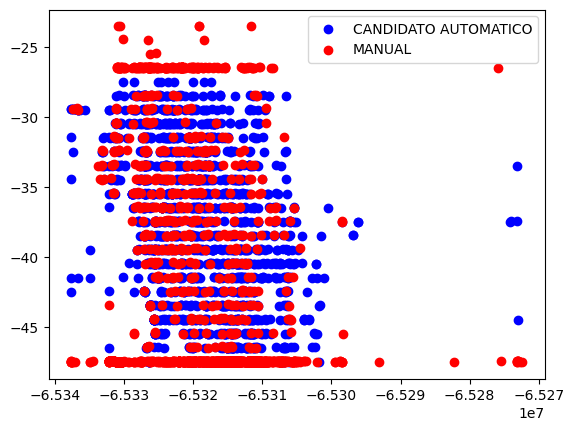

In [67]:
plt.scatter(x_m1[np.where (y == 'CANDIDATO AUTOMATICO')[0],0], x_m1[np.where (y == 'CANDIDATO AUTOMATICO')[0],1], color = "blue", label = names[0])
plt.scatter(x_m1[np.where (y == 'MANUAL')[0],0], x_m1[np.where (y == 'MANUAL')[0],1], color = "red", label = names[1])

plt.legend()
plt.show

Primer metodos de clasificacion KNN

Aprendizaje con datos sin normalizar

0.495
0.5049652777777778
0.5007747933884298
0.499853515625
0.4998185941043084
0.5000499260355029
0.4999869927159209
0.49983796296296296
0.4999196906603212
0.5
0.49955065359477124
0.49966517857142856
0.5000913732867509
0.5001627066115703
0.4995677940884745
0.4999181959833795
0.4999253162627648
0.49997414142779883


Text(0.5, 1.0, 'linea de aprendizaje')

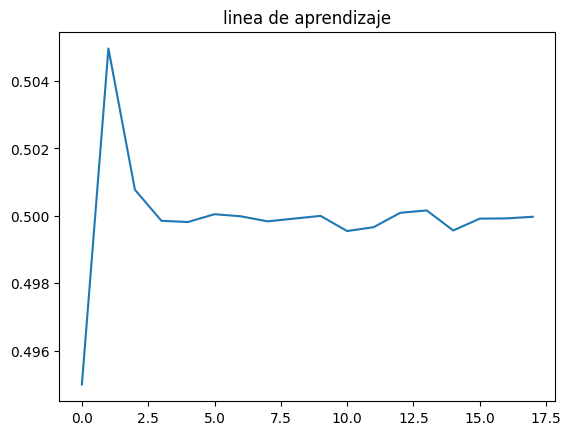

In [68]:
grafica=[]
for i in range(1,90,5):
  X_train,X_test,y_train,y_test =train_test_split(x_m,y,test_size=i/100)
  np.size(X_test,axis =0) 
#entrenamiento
  knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)#cantidad vecinos
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  print(np.mean(y_test == y_pred))
  grafica.append([np.mean(y_test == y_pred)])
plt.plot(grafica) 
plt.title("linea de aprendizaje")   

Aprendizajer aplicando vectores propios

0.5
0.4996875
0.5010330578512396
0.500703125
0.5003401360544217
0.5000776627218935
0.5012174817898023
0.4993364197530864
0.49971891731112433
0.5003249054820416
0.4998812956555171
0.499984056122449
0.49920451491534534
0.5002772038567493
0.5002702836738743
0.49998614958448756
0.49984739368998626
0.5


Text(0.5, 1.0, 'linea de aprendizaje')

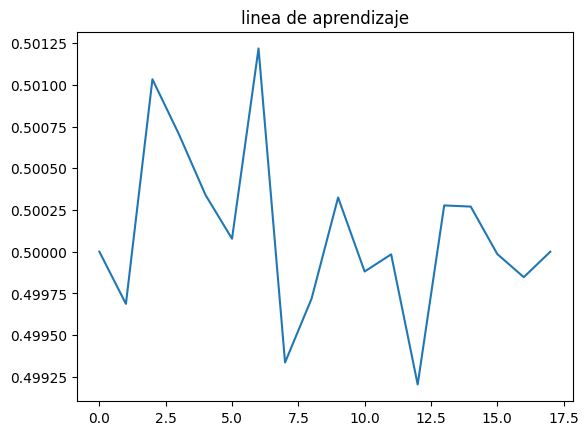

In [69]:
grafica2=[]
for i in range(1,90,5):
  X_train,X_test,y_train,y_test =train_test_split(x_m1,y,test_size=i/100)
  np.size(X_test,axis =0) 
#entrenamiento
  knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)#cantidad vecinos
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  print(np.mean(y_test == y_pred))
  grafica2.append([np.mean(y_test == y_pred)])
plt.plot(grafica2) 
plt.title("linea de aprendizaje")  

In [70]:
df

Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   
...                ...        ...      ...              ...        ...   
10301              2.0        0.0      7.0              1.0        1.0   
42030              2.0        0.0      7.0              1.0        1.0   
26073              2.0        0.0      7.0              1.0        1.0   
13556              2.0        0.0      1.0              1.0        1.0   
39583              1.0        0.0     14.0              1.0        1.0   

               TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante  \
ID_Radicacion                                                              
58922                      0.0      1.0  23401.987508                1.0   
56550                      0.0      1.0  21365.316978                6.0   
55551                      0.0      1.0  22190.478831                1.0   
57324                      0.0      1.0  17551.003157                1.0   
68808                      1.0      1.0  22156.266050                5.0   
...                        ...      ...           ...                ...   
10301                      0.0      1.0  26502.798103                1.0   
42030                      0.0      1.0  21313.005230                1.0   
26073                      0.0      1.0  32109.794417                1.0   
13556                      0.0      1.0  38974.330802               18.0   
39583                      0.0      1.0  18395.418367                1.0   

               Origen  Proceso_Entrada  Oficina  EsFortalecimiento  \
ID_Radicacion                                                        
58922             1.0              1.0     11.0                1.0   
56550             1.0              1.0     77.0                1.0   
55551             1.0              1.0     83.0                1.0   
57324             1.0              1.0     12.0                1.0   
68808             1.0              1.0     70.0                1.0   
...               ...              ...      ...                ...   
10301             1.0              1.0     26.0                1.0   
42030             1.0              1.0     12.0                1.0   
26073             1.0              1.0      7.0                1.0   
13556             1.0              1.0     15.0                1.0   
39583             1.0              1.0     70.0                1.0   

               TipoRadicado  Grupotrabajo  salariosMin                target  
ID_Radicacion                                                                 
58922                   1.0          1.07         1.07                MANUAL  
56550                   1.0         22.05        22.05                MANUAL  
55551                   1.0         22.04        22.04                MANUAL  
57324                   1.0         22.06        22.06                MANUAL  
68808                   1.0          1.01         1.01                MANUAL  
...                     ...           ...          ...                   ...  
10301                   1.0          3.06         3.06  CANDIDATO AUTOMATICO  
42030                   1.0         19.05        19.05  CANDIDATO AUTOMATICO  
26073                   1.0         11.00        11.00  CANDIDATO AUTOMATICO  
13556                   1.0          2.00         2.00  CANDIDATO AUTOMATICO  
39583                   1.0         11.03        11.03  CANDIDATO AUTOMATICO  

[4000 rows x 17 columns]

In [71]:
df = dfbase

##Arbol de regresion lineal

In [72]:
# Seleccionar las columnas 3 y 5 para el diagrama de dispersión
column3 = df.Tramite
column5 = df.salariosMin

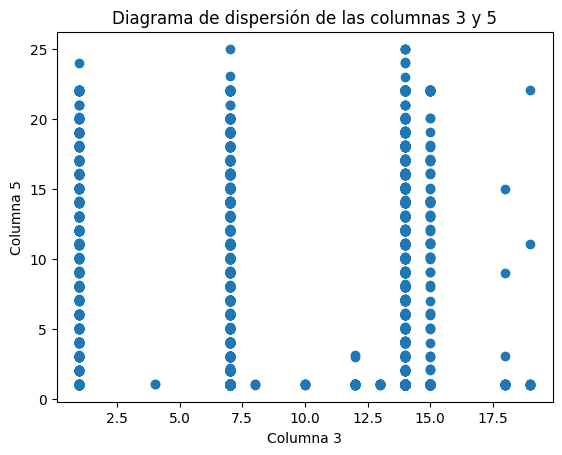

In [73]:
plt.scatter(column3, column5)
plt.xlabel('Columna 3')
plt.ylabel('Columna 5')
plt.title('Diagrama de dispersión de las columnas 3 y 5')
plt.show()

In [74]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(df.Tramite, df.Origen, test_size=0.3, random_state=50)

In [75]:
# Convertir los datos de entrenamiento a un formato aceptado por scikit-learn
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

In [76]:
#Crear el modelo de regresión por árboles y ajustarlo a los datos de entrenamiento
model = DecisionTreeRegressor(max_depth=3)  # Puedes ajustar la profundidad del árbol aquí
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [77]:
model.predict([[12]])

array([1.0384])

In [78]:
# Realizar predicciones sobre los datos de prueba
x_test = np.array(x_test).reshape(-1, 1)
y_pred = model.predict(x_test)

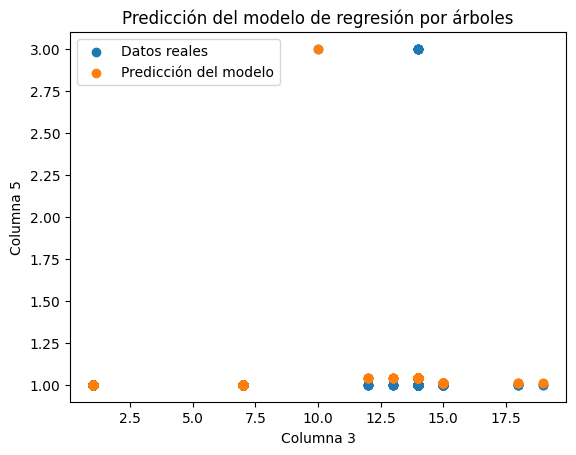

In [79]:
# Graficar la predicción del modelo
plt.scatter(x_test, y_test, label='Datos reales')
plt.scatter(x_test, y_pred, label='Predicción del modelo')
plt.xlabel('Columna 3')
plt.ylabel('Columna 5')
plt.title('Predicción del modelo de regresión por árboles')
plt.legend()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

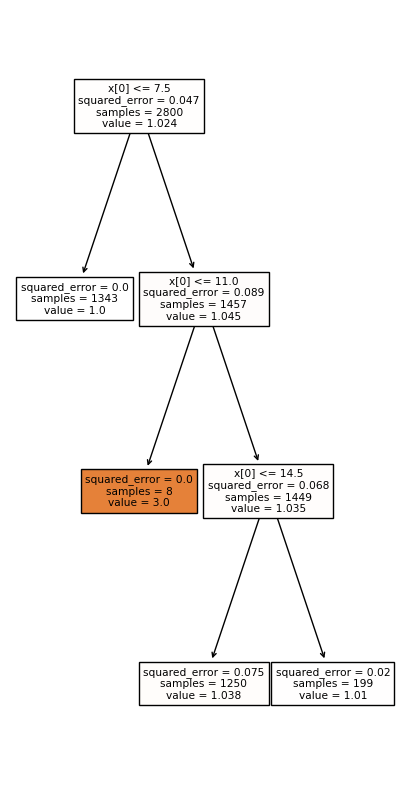

In [80]:
from sklearn import tree
plt.figure(figsize=(5,10))
tree.plot_tree(model,filled= True)
plt.show

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)

RMSE: 0.171955665244406
MAE: 0.033694391959798994
R^2: 0.1054831687838117


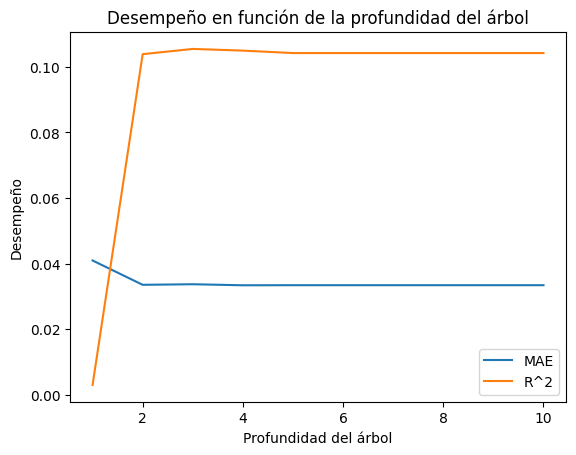

In [82]:
# Evaluar el desempeño en función de la profundidad del árbol
depths = range(1, 11)
mse_values = []
r2_values = []

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    MAE = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(MAE)
    r2_values.append(r2)

plt.plot(depths, mse_values, label='MAE')
plt.plot(depths, r2_values, label='R^2')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Desempeño')
plt.title('Desempeño en función de la profundidad del árbol')
plt.legend()
plt.show()

#Arbol Binario


In [83]:
df= dfbase
df


Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   
...                ...        ...      ...              ...        ...   
10301              2.0        0.0      7.0              1.0        1.0   
42030              2.0        0.0      7.0              1.0        1.0   
26073              2.0        0.0      7.0              1.0        1.0   
13556              2.0        0.0      1.0              1.0        1.0   
39583              1.0        0.0     14.0              1.0        1.0   

               TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante  \
ID_Radicacion                                                              
58922                      0.0      1.0  23401.987508                1.0   
56550                      0.0      1.0  21365.316978                6.0   
55551                      0.0      1.0  22190.478831                1.0   
57324                      0.0      1.0  17551.003157                1.0   
68808                      1.0      1.0  22156.266050                5.0   
...                        ...      ...           ...                ...   
10301                      0.0      1.0  26502.798103                1.0   
42030                      0.0      1.0  21313.005230                1.0   
26073                      0.0      1.0  32109.794417                1.0   
13556                      0.0      1.0  38974.330802               18.0   
39583                      0.0      1.0  18395.418367                1.0   

               Origen  Proceso_Entrada  Oficina  EsFortalecimiento  \
ID_Radicacion                                                        
58922             1.0              1.0     11.0                1.0   
56550             1.0              1.0     77.0                1.0   
55551             1.0              1.0     83.0                1.0   
57324             1.0              1.0     12.0                1.0   
68808             1.0              1.0     70.0                1.0   
...               ...              ...      ...                ...   
10301             1.0              1.0     26.0                1.0   
42030             1.0              1.0     12.0                1.0   
26073             1.0              1.0      7.0                1.0   
13556             1.0              1.0     15.0                1.0   
39583             1.0              1.0     70.0                1.0   

               TipoRadicado  Grupotrabajo  salariosMin                Target  
ID_Radicacion                                                                 
58922                   1.0          1.07         1.07                MANUAL  
56550                   1.0         22.05        22.05                MANUAL  
55551                   1.0         22.04        22.04                MANUAL  
57324                   1.0         22.06        22.06                MANUAL  
68808                   1.0          1.01         1.01                MANUAL  
...                     ...           ...          ...                   ...  
10301                   1.0          3.06         3.06  CANDIDATO AUTOMATICO  
42030                   1.0         19.05        19.05  CANDIDATO AUTOMATICO  
26073                   1.0         11.00        11.00  CANDIDATO AUTOMATICO  
13556                   1.0          2.00         2.00  CANDIDATO AUTOMATICO  
39583                   1.0         11.03        11.03  CANDIDATO AUTOMATICO  

[4000 rows x 17 columns]

In [84]:
X = df.drop(['Target'],axis = 'columns')
Y = df["Target"] # registrando el target

In [85]:
y

array([['MANUAL'],
       ['MANUAL'],
       ['MANUAL'],
       ...,
       ['CANDIDATO AUTOMATICO'],
       ['CANDIDATO AUTOMATICO'],
       ['CANDIDATO AUTOMATICO']], dtype=object)

In [86]:
arbol = tree.DecisionTreeClassifier(criterion= "gini", min_samples_split= 100) # claiicaicon por arbol binario, primero se va a colocar el criterio con el cual va hacer la división de las variables, el 100 es lo minimo q debe tener el conjunto
arbol.fit(X, Y)

DecisionTreeClassifier(min_samples_split=100)

In [87]:
X.columns

Index(['Proceso', 'EsRepresa', 'Tramite', 'TipoLiquidacion', 'Instancia',
       'TiemposPublicos', 'TipoDoc', 'CodigoDane', 'TipoDeSolicitante',
       'Origen', 'Proceso_Entrada', 'Oficina', 'EsFortalecimiento',
       'TipoRadicado', 'Grupotrabajo', 'salariosMin'],
      dtype='object')

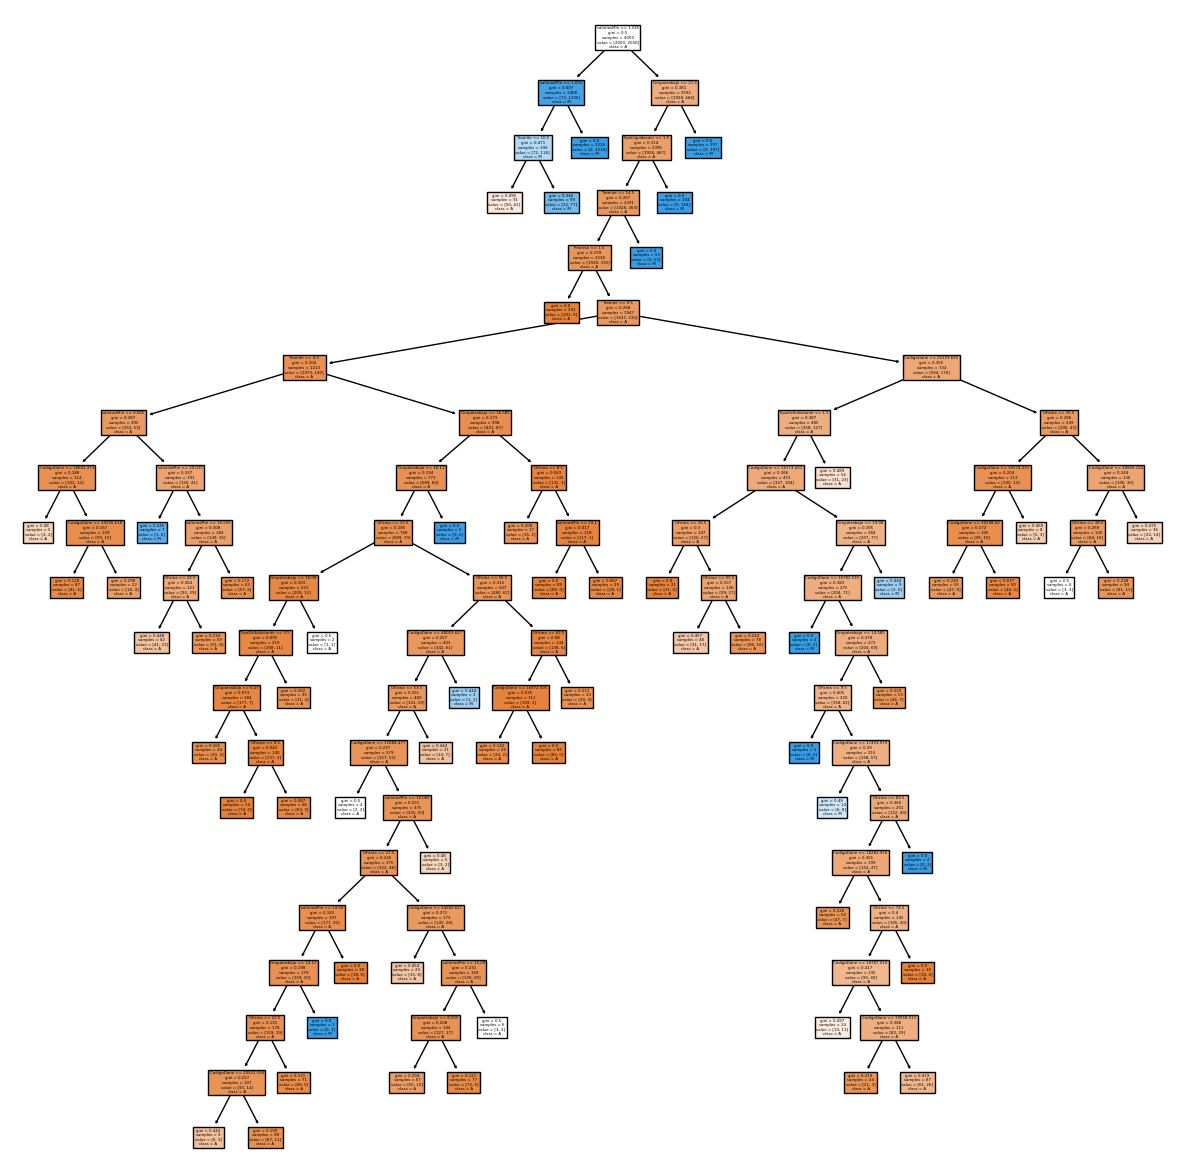

In [88]:
plt.figure(figsize= (15,15))
tree.plot_tree(arbol, feature_names= X.columns, filled=True, class_names= ["A", "M"])
plt.show()

In [89]:
arbol.get_depth()

20

In [90]:
Y_pred = arbol.predict(X)
Y_pred

array(['MANUAL', 'MANUAL', 'MANUAL', ..., 'CANDIDATO AUTOMATICO',
       'CANDIDATO AUTOMATICO', 'CANDIDATO AUTOMATICO'], dtype=object)

In [91]:
matrix = confusion_matrix(Y, Y_pred) ## estado real de los datos de acuerdo con el tarhget
matrix

array([[1967,   33],
       [ 314, 1686]])

In [92]:
S = matrix[0,0]/df.groupby(["Target"]).size()[0]
S

0.9835

In [93]:
E = matrix[1,1]/df.groupby(["Target"]).size()[1]
E

0.843

In [94]:
Acc = (matrix[0,0] + matrix[1,1])/matrix.sum()
Acc

0.91325

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [96]:
x_train.shape

(3200, 16)

In [97]:
x_test.shape

(800, 16)

In [98]:

X1 = df.drop(['Target'],axis = 'columns')
Y1 = df["Target"] # registrando el target

In [99]:
arbol2 = tree.DecisionTreeClassifier(criterion= "gini", min_samples_split= 100) # claiicaicon por arbol binario, primero se va a colocar el criterio con el cual va hacer la división de las variables, el 100 es lo minimo q debe tener el conjunto
arbol2.fit(X1, Y1)

DecisionTreeClassifier(min_samples_split=100)

In [100]:
X1.columns

Index(['Proceso', 'EsRepresa', 'Tramite', 'TipoLiquidacion', 'Instancia',
       'TiemposPublicos', 'TipoDoc', 'CodigoDane', 'TipoDeSolicitante',
       'Origen', 'Proceso_Entrada', 'Oficina', 'EsFortalecimiento',
       'TipoRadicado', 'Grupotrabajo', 'salariosMin'],
      dtype='object')

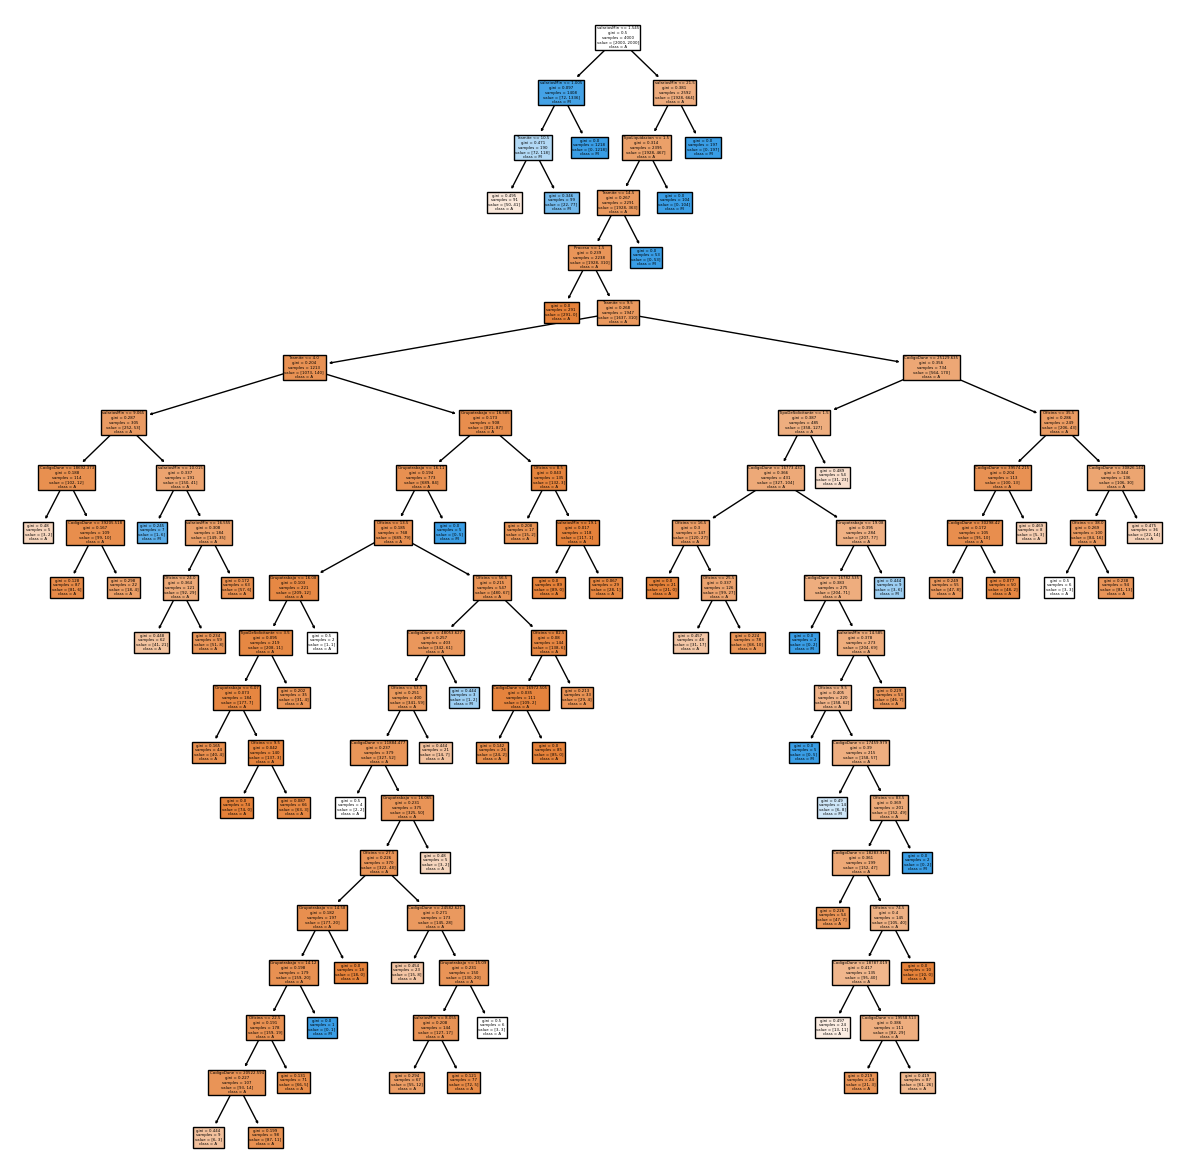

In [101]:
plt.figure(figsize= (15,15))
tree.plot_tree(arbol2, feature_names= X.columns, filled=True, class_names= ["A", "M"])
plt.show()

In [102]:
arbol2.get_depth()

20

In [103]:
Y_pred = arbol2.predict(X)
Y_pred

array(['MANUAL', 'MANUAL', 'MANUAL', ..., 'CANDIDATO AUTOMATICO',
       'CANDIDATO AUTOMATICO', 'CANDIDATO AUTOMATICO'], dtype=object)

In [104]:
matrix = confusion_matrix(Y, Y_pred) ## estado real de los datos de acuerdo con el tarhget
matrix

array([[1967,   33],
       [ 314, 1686]])

In [105]:
S = matrix[0,0]/df.groupby(["Target"]).size()[0]
S

0.9835

In [106]:
E = matrix[1,1]/df.groupby(["Target"]).size()[0]
E

0.843

In [107]:
matrix

array([[1967,   33],
       [ 314, 1686]])

In [108]:
Acc = (matrix[0,0] + matrix[1,1])/matrix.sum()
Acc

0.91325

clasificacion RNA

In [ ]:
df = dfbase
df

#validacionCruzada

In [133]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataframe


# Separar las características (X) y la variable objetivo (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Codificar la variable objetivo utilizando one-hot encoding
y_encoded = pd.get_dummies(y)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir las métricas a evaluar
scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}

# Realizar la validación cruzada
results = cross_validate(model, X_scaled, y_encoded, cv=5, scoring=scoring)

# Obtener los resultados de las métricas
mse_scores = results['test_mse']
r2_scores = results['test_r2']

# Calcular el error cuadrado medio medio
mse_mean = -mse_scores.mean()

# Calcular el coeficiente de determinación medio
r2_mean = r2_scores.mean()

print("Error cuadrado medio medio:", mse_mean)
print("Coeficiente de determinación medio:", r2_mean)


Error cuadrado medio medio: 0.19276083253118187
Coeficiente de determinación medio: 0.08676663727338832


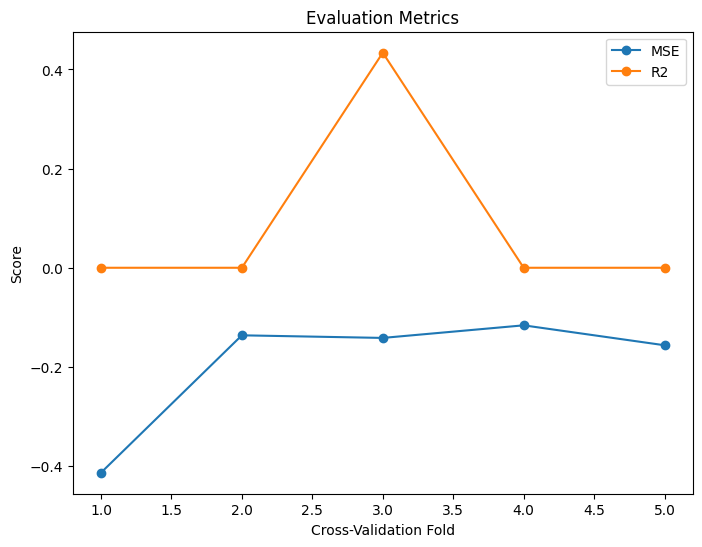

In [135]:
import matplotlib.pyplot as plt

# Create line plots
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', label='MSE')
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', label='R2')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.legend()
plt.show()

In [136]:
df = dfbase
df

Proceso  EsRepresa  Tramite  TipoLiquidacion  Instancia  \
ID_Radicacion                                                            
58922              2.0        0.0     14.0              1.0        1.0   
56550              2.0        0.0     14.0              2.0        1.0   
55551              2.0        0.0      7.0              1.0        1.0   
57324              2.0        0.0     14.0              1.0        1.0   
68808              2.0        0.0     15.0              1.0        1.0   
...                ...        ...      ...              ...        ...   
10301              2.0        0.0      7.0              1.0        1.0   
42030              2.0        0.0      7.0              1.0        1.0   
26073              2.0        0.0      7.0              1.0        1.0   
13556              2.0        0.0      1.0              1.0        1.0   
39583              1.0        0.0     14.0              1.0        1.0   

               TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante  \
ID_Radicacion                                                              
58922                      0.0      1.0  23401.987508                1.0   
56550                      0.0      1.0  21365.316978                6.0   
55551                      0.0      1.0  22190.478831                1.0   
57324                      0.0      1.0  17551.003157                1.0   
68808                      1.0      1.0  22156.266050                5.0   
...                        ...      ...           ...                ...   
10301                      0.0      1.0  26502.798103                1.0   
42030                      0.0      1.0  21313.005230                1.0   
26073                      0.0      1.0  32109.794417                1.0   
13556                      0.0      1.0  38974.330802               18.0   
39583                      0.0      1.0  18395.418367                1.0   

               Origen  Proceso_Entrada  Oficina  EsFortalecimiento  \
ID_Radicacion                                                        
58922             1.0              1.0     11.0                1.0   
56550             1.0              1.0     77.0                1.0   
55551             1.0              1.0     83.0                1.0   
57324             1.0              1.0     12.0                1.0   
68808             1.0              1.0     70.0                1.0   
...               ...              ...      ...                ...   
10301             1.0              1.0     26.0                1.0   
42030             1.0              1.0     12.0                1.0   
26073             1.0              1.0      7.0                1.0   
13556             1.0              1.0     15.0                1.0   
39583             1.0              1.0     70.0                1.0   

               TipoRadicado  Grupotrabajo  salariosMin                Target  
ID_Radicacion                                                                 
58922                   1.0          1.07         1.07                MANUAL  
56550                   1.0         22.05        22.05                MANUAL  
55551                   1.0         22.04        22.04                MANUAL  
57324                   1.0         22.06        22.06                MANUAL  
68808                   1.0          1.01         1.01                MANUAL  
...                     ...           ...          ...                   ...  
10301                   1.0          3.06         3.06  CANDIDATO AUTOMATICO  
42030                   1.0         19.05        19.05  CANDIDATO AUTOMATICO  
26073                   1.0         11.00        11.00  CANDIDATO AUTOMATICO  
13556                   1.0          2.00         2.00  CANDIDATO AUTOMATICO  
39583                   1.0         11.03        11.03  CANDIDATO AUTOMATICO  

[4000 rows x 17 columns]

In [137]:
df.columns

Index(['Proceso', 'EsRepresa', 'Tramite', 'TipoLiquidacion', 'Instancia',
       'TiemposPublicos', 'TipoDoc', 'CodigoDane', 'TipoDeSolicitante',
       'Origen', 'Proceso_Entrada', 'Oficina', 'EsFortalecimiento',
       'TipoRadicado', 'Grupotrabajo', 'salariosMin', 'Target'],
      dtype='object')

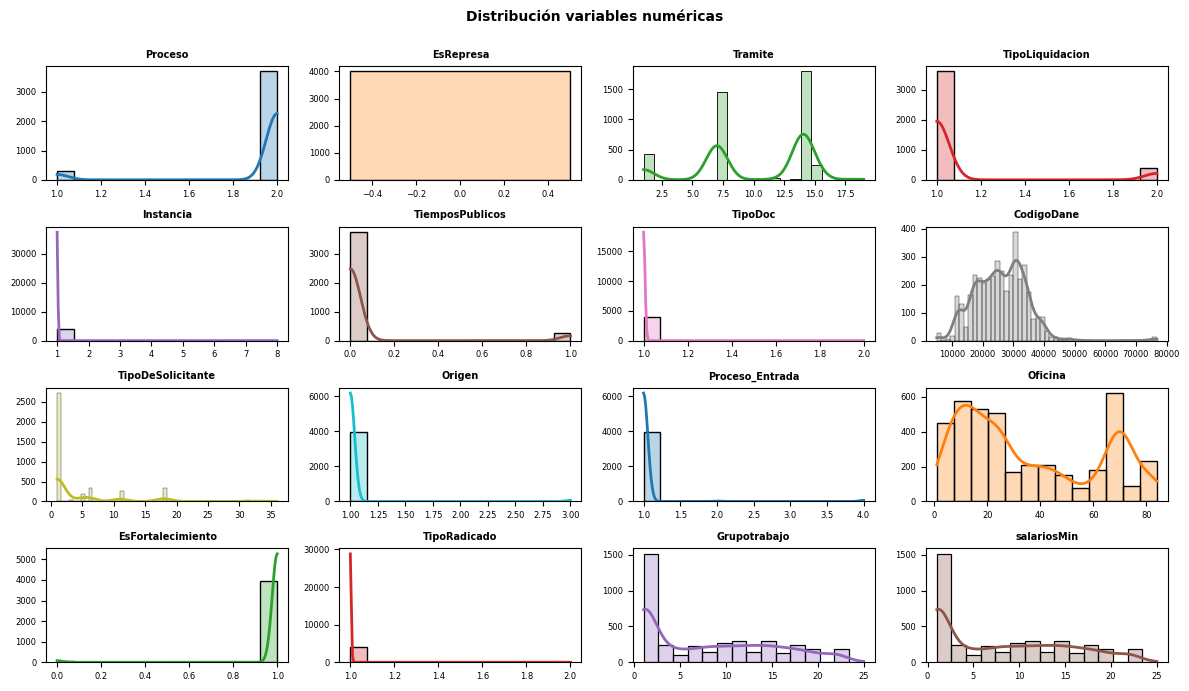

In [138]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 7))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [139]:
from sklearn.model_selection import train_test_split
# Codificar la variable objetivo utilizando one-hot encoding
y_encoded = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Target', axis = 'columns'),
                                        df['Target'],
                                        train_size   = 0.8,
                                        random_state = 50,
                                        shuffle      = True
                                    )

In [113]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())

print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())


Partición de entrenamento
-----------------------


count       3200
unique         2
top       MANUAL
freq        1602
Name: Target, dtype: object

Proceso  EsRepresa      Tramite  TipoLiquidacion    Instancia  \
count  3200.000000     3200.0  3200.000000       3200.00000  3200.000000   
mean      1.924375        0.0    10.070625          1.09625     1.002188   
std       0.264438        0.0     4.643934          0.29498     0.123744   
min       1.000000        0.0     1.000000          1.00000     1.000000   
25%       2.000000        0.0     7.000000          1.00000     1.000000   
50%       2.000000        0.0    14.000000          1.00000     1.000000   
75%       2.000000        0.0    14.000000          1.00000     1.000000   
max       2.000000        0.0    19.000000          2.00000     8.000000   

       TiemposPublicos      TipoDoc    CodigoDane  TipoDeSolicitante  \
count      3200.000000  3200.000000   3200.000000        3200.000000   
mean          0.062500     1.001562  25809.508204           4.435937   
std           0.242099     0.039504   8552.845859           6.485294   
min           0.000000     1.000000   5001.000000           1.000000   
25%           0.000000     1.000000  19558.609274           1.000000   
50%           0.000000     1.000000  25836.826472           1.000000   
75%           0.000000     1.000000  31434.195365           6.000000   
max           1.000000     2.000000  76834.000000          36.000000   

            Origen  Proceso_Entrada      Oficina  EsFortalecimiento  \
count  3200.000000      3200.000000  3200.000000        3200.000000   
mean      1.022500         1.035313    35.693359           0.985313   
std       0.210968         0.312804    25.408602           0.120318   
min       1.000000         1.000000     1.000000           0.000000   
25%       1.000000         1.000000    13.000000           1.000000   
50%       1.000000         1.000000    26.000000           1.000000   
75%       1.000000         1.000000    64.000000           1.000000   
max       3.000000         4.000000    84.000000           1.000000   

       TipoRadicado  Grupotrabajo  salariosMin  
count   3200.000000   3200.000000  3200.000000  
mean       1.000625      8.078094     8.078094  
std        0.024996      6.931089     6.931089  
min        1.000000      1.000000     1.000000  
25%        1.000000      1.070000     1.070000  
50%        1.000000      7.040000     7.040000  
75%        1.000000     14.030000    14.030000  
max        2.000000     25.000000    25.000000

 
Partición de test
-----------------------


count                      800
unique                       2
top       CANDIDATO AUTOMATICO
freq                       402
Name: Target, dtype: object

Proceso  EsRepresa     Tramite  TipoLiquidacion   Instancia  \
count  800.000000      800.0  800.000000        800.00000  800.000000   
mean     1.927500        0.0   10.376250          1.10875    1.003750   
std      0.259476        0.0    4.485235          0.31152    0.106066   
min      1.000000        0.0    1.000000          1.00000    1.000000   
25%      2.000000        0.0    7.000000          1.00000    1.000000   
50%      2.000000        0.0   14.000000          1.00000    1.000000   
75%      2.000000        0.0   14.000000          1.00000    1.000000   
max      2.000000        0.0   19.000000          2.00000    4.000000   

       TiemposPublicos  TipoDoc    CodigoDane  TipoDeSolicitante      Origen  \
count        800.00000    800.0    800.000000         800.000000  800.000000   
mean           0.06500      1.0  25773.131821           3.968039    1.017500   
std            0.24668      0.0   8194.879944           6.047842    0.186379   
min            0.00000      1.0   5001.000000           1.000000    1.000000   
25%            0.00000      1.0  19588.391280           1.000000    1.000000   
50%            0.00000      1.0  25966.166698           1.000000    1.000000   
75%            0.00000      1.0  31435.635381           5.000000    1.000000   
max            1.00000      1.0  76147.000000          34.000000    3.000000   

       Proceso_Entrada     Oficina  EsFortalecimiento  TipoRadicado  \
count       800.000000  800.000000         800.000000         800.0   
mean          1.032500   36.015162           0.985000           1.0   
std           0.289912   26.051147           0.121628           0.0   
min           1.000000    1.000000           0.000000           1.0   
25%           1.000000   13.000000           1.000000           1.0   
50%           1.000000   26.000000           1.000000           1.0   
75%           1.000000   64.000000           1.000000           1.0   
max           4.000000   84.000000           1.000000           1.0   

       Grupotrabajo  salariosMin  
count    800.000000   800.000000  
mean       8.166950     8.166950  
std        7.099934     7.099934  
min        1.000000     1.000000  
25%        1.060000     1.060000  
50%        7.040000     7.040000  
75%       14.092500    14.092500  
max       25.000000    25.000000

In [114]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()



# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )



preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

In [115]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Proceso', 'EsRepresa', 'Tramite',
                                  'TipoLiquidacion', 'Instancia',
                                  'TiemposPublicos', 'TipoDoc', 'CodigoDane',
                                  'TipoDeSolicitante', 'Origen',
                                  'Proceso_Entrada', 'Oficina',
                                  'EsFortalecimiento', 'TipoRadicado',
                                  'Grupotrabajo', 'salariosMin'])])

In [116]:
set_config(display='text')

In [140]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [141]:

labels = np.concatenate([numeric_cols])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Proceso            3200 non-null   float64
 1   EsRepresa          3200 non-null   float64
 2   Tramite            3200 non-null   float64
 3   TipoLiquidacion    3200 non-null   float64
 4   Instancia          3200 non-null   float64
 5   TiemposPublicos    3200 non-null   float64
 6   TipoDoc            3200 non-null   float64
 7   CodigoDane         3200 non-null   float64
 8   TipoDeSolicitante  3200 non-null   float64
 9   Origen             3200 non-null   float64
 10  Proceso_Entrada    3200 non-null   float64
 11  Oficina            3200 non-null   float64
 12  EsFortalecimiento  3200 non-null   float64
 13  TipoRadicado       3200 non-null   float64
 14  Grupotrabajo       3200 non-null   float64
 15  salariosMin        3200 non-null   float64
dtypes: float64(16)
memory us

In [142]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [143]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}


In [146]:
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )


# Codificar la variable objetivo utilizando one-hot encoding
y_train = pd.get_dummies(y_train)
grid.fit(X = X_train, y = y_train)




RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Proceso',
                                                                                'EsRepresa',
                                                                                'Tramite',
                                                                                'TipoLiquidacion',
                                                                                'Instancia',
                                           

In [147]:
from sklearn.model_selection import GridSearchCV

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

param_modelo__learning_rate_init param_modelo__hidden_layer_sizes  \
33                             0.01                         (10, 10)   
0                             0.001                               10   
16                             0.01                         (10, 10)   
14                             0.01                         (10, 10)   
13                             0.01                         (10, 10)   
34                             0.01                         (10, 10)   
6                             0.001                               10   
18                            0.001                               10   
26                            0.001                               10   
28                             0.01                         (10, 10)   

   param_modelo__alpha  mean_test_score  std_test_score  mean_train_score  \
33            2.154435        -0.084235        0.008180         -0.077701   
0             0.464159        -0.086382        0.007701         -0.080582   
16               0.001        -0.088096        0.007609         -0.076466   
14            0.004642        -0.088159        0.008022         -0.075701   
13                 0.1        -0.088807        0.009422         -0.076764   
34                10.0        -0.088809        0.007412         -0.085492   
6                  0.1        -0.088880        0.007440         -0.081869   
18            2.154435        -0.088942        0.007999         -0.083625   
26            0.004642        -0.089308        0.007411         -0.081857   
28            0.464159        -0.089336        0.005208         -0.076055   

    std_train_score  
33         0.001810  
0          0.001827  
16         0.001904  
14         0.001610  
13         0.001015  
34         0.002832  
6          0.003522  
18         0.002902  
26         0.001985  
28         0.002505

In [160]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
X_test = pd.get_dummies(X_test)
y_test = pd.get_dummies(y_test)
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )

print('Error de test (rmse): ', rmse)

Error de test (rmse):  0.2702649405872537


In [152]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 2.154434690031882,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}